<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Chicago West Nile Virus Prediction

### Contents:
#### Part 2 (of 4)
- Executive Summary
- Problem Statement
- Background & Research
- Data Wrangling
- [Exploration & Visualisation](#Exploration-&-Visualisation)
- Pre-Processing & Modelling
- Results & Analysis
- Kaggle Prediction
- Cost-Benefit Analysis
- Recommendations
- Conclusions
- References

## Exploration & Visualisation

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max.colwidth', 100)

### Import DataFrames

In [2]:
# import train as trap
trap = pd.read_csv('../data/train_clean.csv')

In [3]:
# import test as kaggle
kaggle = pd.read_csv('../data/test_clean.csv')

In [4]:
# import weather as weather
weather = pd.read_csv('../data/weather_clean.csv')

In [5]:
# import spray as spray
spray = pd.read_csv('../data/spray_clean.csv')

In [6]:
# import train_weather as trap_weather
trap_weather = pd.read_csv('../data/train_weather_clean.csv')

In [7]:
# import test_weather as kaggle_weather
kaggle_weather = pd.read_csv('../data/test_weather_clean.csv')

### Glimpse DataFrames

In [8]:
# check out trap
trap.head()

Date  Day  Month  Year                 Species  Trap   Latitude  \
0  2007-05-29   29      5  2007           CULEX PIPIENS  T096  41.731922   
1  2007-05-29   29      5  2007  CULEX PIPIENS/RESTUANS  T002  41.954690   
2  2007-05-29   29      5  2007  CULEX PIPIENS/RESTUANS  T015  41.974089   
3  2007-05-29   29      5  2007  CULEX PIPIENS/RESTUANS  T048  41.867108   
4  2007-05-29   29      5  2007  CULEX PIPIENS/RESTUANS  T050  41.919343   

   Longitude  Station  NumMosquitos  WnvPresent  
0 -87.677512        2             1           0  
1 -87.800991        1             1           0  
2 -87.824812        1             1           0  
3 -87.654224        2             1           0  
4 -87.694259        1             1           0

In [9]:
# check out kaggle
kaggle.head()

Id        Date  Day  Month  Year                 Species  Trap  Latitude  \
0   1  2008-06-11   11      6  2008  CULEX PIPIENS/RESTUANS  T002  41.95469   
1   2  2008-06-11   11      6  2008          CULEX RESTUANS  T002  41.95469   
2   3  2008-06-11   11      6  2008           CULEX PIPIENS  T002  41.95469   
3   4  2008-06-11   11      6  2008        CULEX SALINARIUS  T002  41.95469   
4   5  2008-06-11   11      6  2008         CULEX TERRITANS  T002  41.95469   

   Longitude  Station  
0 -87.800991        1  
1 -87.800991        1  
2 -87.800991        1  
3 -87.800991        1  
4 -87.800991        1

In [10]:
# check out weather
weather.head()

Date  Station  Latitude  Longitude  Tmax  Tmin  Tavg         RH  \
0  2007-05-01        1    41.995    -87.933  83.0  50.0  67.0  55.555556   
1  2007-05-01        2    41.786    -87.752  84.0  52.0  68.0  52.777778   
2  2007-05-02        1    41.995    -87.933  59.0  42.0  51.0  75.000000   
3  2007-05-02        2    41.786    -87.752  60.0  43.0  52.0  72.222222   
4  2007-05-03        1    41.995    -87.933  66.0  46.0  56.0  55.555556   

   DewPoint  WetBulb  Heat  Cool  PrecipTotal  SeaLevel  ResultSpeed  \
0      51.0     56.0   0.0   2.0          0.0     29.82          1.7   
1      51.0     57.0   0.0   3.0          0.0     29.82          2.7   
2      42.0     47.0  14.0   0.0          0.0     30.09         13.0   
3      42.0     47.0  13.0   0.0          0.0     30.08         13.3   
4      40.0     48.0   9.0   0.0          0.0     30.12         11.7   

   ResultDir  AvgSpeed  
0       27.0       9.2  
1       25.0       9.6  
2        4.0      13.4  
3        2.0      13.4  
4        7.0      11.9

In [11]:
# check out spray
spray.head()

Date   Latitude  Longitude  Year  Month  Week  Day
0  2011-08-29  42.391623 -88.089163  2011      8    35   29
1  2011-08-29  42.391348 -88.089163  2011      8    35   29
2  2011-08-29  42.391022 -88.089157  2011      8    35   29
3  2011-08-29  42.390637 -88.089158  2011      8    35   29
4  2011-08-29  42.390410 -88.088858  2011      8    35   29

In [12]:
# check out trap_weather
trap_weather.head()

Date  Day  Month  Year                 Species  Trap   Latitude  \
0  2007-05-29   29      5  2007           CULEX PIPIENS  T096  41.731922   
1  2007-05-29   29      5  2007  CULEX PIPIENS/RESTUANS  T002  41.954690   
2  2007-05-29   29      5  2007  CULEX PIPIENS/RESTUANS  T015  41.974089   
3  2007-05-29   29      5  2007  CULEX PIPIENS/RESTUANS  T048  41.867108   
4  2007-05-29   29      5  2007  CULEX PIPIENS/RESTUANS  T050  41.919343   

   Longitude  Station  NumMosquitos  WnvPresent  Tmax  Tmin  Tavg         RH  \
0 -87.677512        2             1           0  88.0  65.0  77.0  50.000000   
1 -87.800991        1             1           0  88.0  60.0  74.0  55.555556   
2 -87.824812        1             1           0  88.0  60.0  74.0  55.555556   
3 -87.654224        2             1           0  88.0  65.0  77.0  50.000000   
4 -87.694259        1             1           0  88.0  60.0  74.0  55.555556   

   DewPoint  WetBulb  Heat  Cool  PrecipTotal  SeaLevel  ResultSpeed  \
0      59.0     66.0   0.0  12.0          0.0     30.09          5.8   
1      58.0     65.0   0.0   9.0          0.0     30.11          5.8   
2      58.0     65.0   0.0   9.0          0.0     30.11          5.8   
3      59.0     66.0   0.0  12.0          0.0     30.09          5.8   
4      58.0     65.0   0.0   9.0          0.0     30.11          5.8   

   ResultDir  AvgSpeed  
0       16.0       7.4  
1       18.0       6.5  
2       18.0       6.5  
3       16.0       7.4  
4       18.0       6.5

In [13]:
# check out kaggle_weather
kaggle_weather.head()

Id        Date  Day  Month  Year                 Species  Trap  Latitude  \
0   1  2008-06-11   11      6  2008  CULEX PIPIENS/RESTUANS  T002  41.95469   
1   2  2008-06-11   11      6  2008          CULEX RESTUANS  T002  41.95469   
2   3  2008-06-11   11      6  2008           CULEX PIPIENS  T002  41.95469   
3   4  2008-06-11   11      6  2008        CULEX SALINARIUS  T002  41.95469   
4   5  2008-06-11   11      6  2008         CULEX TERRITANS  T002  41.95469   

   Longitude  Station  Tmax  Tmin  Tavg    RH  DewPoint  WetBulb  Heat  Cool  \
0 -87.800991        1  86.0  61.0  74.0  50.0      56.0     64.0   0.0   9.0   
1 -87.800991        1  86.0  61.0  74.0  50.0      56.0     64.0   0.0   9.0   
2 -87.800991        1  86.0  61.0  74.0  50.0      56.0     64.0   0.0   9.0   
3 -87.800991        1  86.0  61.0  74.0  50.0      56.0     64.0   0.0   9.0   
4 -87.800991        1  86.0  61.0  74.0  50.0      56.0     64.0   0.0   9.0   

   PrecipTotal  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
0          0.0     29.99          8.9       18.0      10.0  
1          0.0     29.99          8.9       18.0      10.0  
2          0.0     29.99          8.9       18.0      10.0  
3          0.0     29.99          8.9       18.0      10.0  
4          0.0     29.99          8.9       18.0      10.0

### Descriptive Statistics

#### Explore Trap Dataset

In [14]:
trap.describe()

Day        Month         Year     Latitude    Longitude  \
count  8610.000000  8610.000000  8610.000000  8610.000000  8610.000000   
mean     15.485598     7.705459  2009.713821    41.844422   -87.695237   
std       8.748169     1.103277     2.338148     0.107076     0.084921   
min       1.000000     5.000000  2007.000000    41.644612   -87.930995   
25%       8.000000     7.000000  2007.000000    41.750498   -87.752411   
50%      15.000000     8.000000  2009.000000    41.857402   -87.694991   
75%      24.000000     9.000000  2011.000000    41.944869   -87.642984   
max      31.000000    10.000000  2013.000000    42.017430   -87.531635   

           Station  NumMosquitos   WnvPresent  
count  8610.000000   8610.000000  8610.000000  
mean      1.605807     11.494890     0.053078  
std       0.488705     20.743818     0.224202  
min       1.000000      1.000000     0.000000  
25%       1.000000      2.000000     0.000000  
50%       2.000000      4.000000     0.000000  
75%       2.000000     11.000000     0.000000  
max       2.000000    254.000000     1.000000

In [15]:
trap.drop(columns='Date').describe(include='object')

Species  Trap
count                     8610  8610
unique                       7   136
top     CULEX PIPIENS/RESTUANS  T900
freq                      3899   182

#### Explore Kaggle Dataset

In [16]:
kaggle.describe()

Id            Day          Month           Year  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean    58147.000000      16.187681       7.620244    2010.702759   
std     33571.041765       8.800007       1.065842       2.128750   
min         1.000000       1.000000       6.000000    2008.000000   
25%     29074.000000      10.000000       7.000000    2008.000000   
50%     58147.000000      17.000000       8.000000    2010.000000   
75%     87220.000000      24.000000       8.000000    2012.000000   
max    116293.000000      31.000000      10.000000    2014.000000   

            Latitude      Longitude        Station  
count  116293.000000  116293.000000  116293.000000  
mean       41.849389     -87.693658       1.584033  
std         0.106593       0.080699       0.492890  
min        41.644612     -87.930995       1.000000  
25%        41.753411     -87.750938       1.000000  
50%        41.862292     -87.694991       2.000000  
75%        41.951866     -87.648860       2.000000  
max        42.017430     -87.531635       2.000000

In [17]:
kaggle.drop(columns='Date').describe(include='object')

Species    Trap
count                   116293  116293
unique                       8     149
top     CULEX PIPIENS/RESTUANS    T009
freq                     15359    1528

#### Explore Weather Dataset

In [18]:
weather.describe()

Station     Latitude    Longitude         Tmax         Tmin  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean      1.500000    41.890500   -87.842500    76.166101    57.810462   
std       0.500085     0.104518     0.090515    11.461970    10.381939   
min       1.000000    41.786000   -87.933000    41.000000    29.000000   
25%       1.000000    41.786000   -87.933000    69.000000    50.000000   
50%       1.500000    41.890500   -87.842500    78.000000    59.000000   
75%       2.000000    41.995000   -87.752000    85.000000    66.000000   
max       2.000000    41.995000   -87.752000   104.000000    83.000000   

              Tavg           RH     DewPoint      WetBulb         Heat  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean     67.239470    61.717806    53.457880    59.313179     3.402853   
std      10.539316    14.350465    10.675181     9.280637     5.946934   
min      36.000000     8.333333    22.000000    32.000000     0.000000   
25%      60.000000    52.777778    46.000000    53.000000     0.000000   
50%      69.000000    61.111111    54.000000    61.000000     0.000000   
75%      75.000000    72.222222    62.000000    67.000000     5.000000   
max      94.000000   105.555556    75.000000    78.000000    29.000000   

              Cool  PrecipTotal     SeaLevel  ResultSpeed    ResultDir  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean      5.642323     0.131780    29.968135     6.960666    17.494905   
std       6.107219     0.393031     0.158354     3.587527    10.063609   
min       0.000000     0.000000    29.230000     0.100000     1.000000   
25%       0.000000     0.000000    29.870000     4.300000     7.000000   
50%       4.000000     0.000000    29.970000     6.400000    19.000000   
75%      10.000000     0.060000    30.060000     9.200000    25.000000   
max      29.000000     6.860000    30.530000    24.100000    36.000000   

          AvgSpeed  
count  2944.000000  
mean      8.579959  
std       3.145733  
min       1.700000  
25%       6.300000  
50%       8.100000  
75%      10.400000  
max      26.300000

#### Explore Spray Dataset

In [19]:
spray.describe()

Latitude     Longitude          Year         Month          Week  \
count  14294.000000  14294.000000  14294.000000  14294.000000  14294.000000   
mean      41.901739    -87.734512   2012.766615      7.908213     32.933399   
std        0.105100      0.067599      0.642129      0.657852      2.431092   
min       41.713925    -88.096468   2011.000000      7.000000     29.000000   
25%       41.782669    -87.789607   2013.000000      7.000000     30.000000   
50%       41.937578    -87.724781   2013.000000      8.000000     33.000000   
75%       41.977217    -87.692107   2013.000000      8.000000     35.000000   
max       42.395983    -87.586727   2013.000000      9.000000     36.000000   

                Day  
count  14294.000000  
mean      17.455086  
std        7.858571  
min        5.000000  
25%        8.000000  
50%       17.000000  
75%       25.000000  
max       29.000000

#### Explore Trap-Weather Dataset

In [20]:
trap_weather.describe()

Day        Month         Year     Latitude    Longitude  \
count  8610.000000  8610.000000  8610.000000  8610.000000  8610.000000   
mean     15.485598     7.705459  2009.713821    41.844422   -87.695237   
std       8.748169     1.103277     2.338148     0.107076     0.084921   
min       1.000000     5.000000  2007.000000    41.644612   -87.930995   
25%       8.000000     7.000000  2007.000000    41.750498   -87.752411   
50%      15.000000     8.000000  2009.000000    41.857402   -87.694991   
75%      24.000000     9.000000  2011.000000    41.944869   -87.642984   
max      31.000000    10.000000  2013.000000    42.017430   -87.531635   

           Station  NumMosquitos   WnvPresent         Tmax         Tmin  \
count  8610.000000   8610.000000  8610.000000  8610.000000  8610.000000   
mean      1.605807     11.494890     0.053078    81.394890    63.332172   
std       0.488705     20.743818     0.224202     8.401371     7.752981   
min       1.000000      1.000000     0.000000    57.000000    41.000000   
25%       1.000000      2.000000     0.000000    78.000000    58.000000   
50%       2.000000      4.000000     0.000000    83.000000    65.000000   
75%       2.000000     11.000000     0.000000    87.000000    69.000000   
max       2.000000    254.000000     1.000000    97.000000    79.000000   

              Tavg           RH     DewPoint      WetBulb         Heat  \
count  8610.000000  8610.000000  8610.000000  8610.000000  8610.000000   
mean     72.596051    63.030391    59.286992    64.405575     0.977003   
std       7.628826    11.505134     7.972014     6.832103     2.828457   
min      50.000000    33.333333    38.000000    46.000000     0.000000   
25%      70.000000    52.777778    54.000000    60.000000     0.000000   
50%      74.000000    63.888889    59.000000    65.000000     0.000000   
75%      78.000000    75.000000    67.000000    70.000000     0.000000   
max      87.000000    88.888889    73.000000    76.000000    15.000000   

              Cool  PrecipTotal     SeaLevel  ResultSpeed    ResultDir  \
count  8610.000000  8610.000000  8610.000000  8610.000000  8610.000000   
mean      8.573055     0.153425    29.960485     5.987340    17.910569   
std       5.783171     0.386269     0.120057     2.876534     9.181088   
min       0.000000     0.000000    29.590000     0.100000     1.000000   
25%       5.000000     0.000000    29.870000     4.000000     9.000000   
50%       9.000000     0.000000    29.960000     5.800000    19.000000   
75%      13.000000     0.120000    30.050000     7.800000    24.000000   
max      22.000000     3.970000    30.330000    15.400000    36.000000   

          AvgSpeed  
count  8610.000000  
mean      7.509605  
std       2.516173  
min       2.100000  
25%       5.900000  
50%       7.200000  
75%       9.200000  
max      16.300000

In [21]:
trap_weather.drop(columns='Date').describe(include='object')

Species  Trap
count                     8610  8610
unique                       7   136
top     CULEX PIPIENS/RESTUANS  T900
freq                      3899   182

#### Explore Kaggle-Weather Dataset

In [22]:
kaggle_weather.describe()

Id            Day          Month           Year  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean    58147.000000      16.187681       7.620244    2010.702759   
std     33571.041765       8.800007       1.065842       2.128750   
min         1.000000       1.000000       6.000000    2008.000000   
25%     29074.000000      10.000000       7.000000    2008.000000   
50%     58147.000000      17.000000       8.000000    2010.000000   
75%     87220.000000      24.000000       8.000000    2012.000000   
max    116293.000000      31.000000      10.000000    2014.000000   

            Latitude      Longitude        Station           Tmax  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean       41.849389     -87.693658       1.584033      81.260342   
std         0.106593       0.080699       0.492890       7.465086   
min        41.644612     -87.930995       1.000000      56.000000   
25%        41.753411     -87.750938       1.000000      76.000000   
50%        41.862292     -87.694991       2.000000      82.000000   
75%        41.951866     -87.648860       2.000000      87.000000   
max        42.017430     -87.531635       2.000000      95.000000   

                Tmin           Tavg             RH       DewPoint  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean       62.654244      72.208766      59.260661      57.542604   
std         6.269043       6.369139      13.532875       7.167946   
min        48.000000      53.000000      11.111111      38.000000   
25%        58.000000      68.000000      50.000000      52.000000   
50%        63.000000      73.000000      61.111111      58.000000   
75%        68.000000      77.000000      69.444444      63.000000   
max        75.000000      84.000000      88.888889      72.000000   

             WetBulb           Heat           Cool    PrecipTotal  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean       63.375741       0.506961       7.715727       0.151932   
std         5.678797       1.647216       5.479909       0.422888   
min        47.000000       0.000000       0.000000       0.000000   
25%        59.000000       0.000000       3.000000       0.000000   
50%        64.000000       0.000000       8.000000       0.000000   
75%        68.000000       0.000000      12.000000       0.050000   
max        74.000000      12.000000      19.000000       3.150000   

            SeaLevel    ResultSpeed      ResultDir       AvgSpeed  
count  116293.000000  116293.000000  116293.000000  116293.000000  
mean       29.976616       6.255115      18.297172       8.024834  
std         0.123536       2.873224      10.134176       2.538825  
min        29.690000       0.600000       1.000000       1.900000  
25%        29.880000       4.200000       9.000000       6.100000  
50%        29.980000       6.200000      19.000000       7.900000  
75%        30.060000       7.800000      26.000000       9.600000  
max        30.330000      16.600000      36.000000      17.300000

In [23]:
kaggle_weather.drop(columns='Date').describe(include='object')

Species    Trap
count                   116293  116293
unique                       8     149
top     CULEX PIPIENS/RESTUANS    T009
freq                     15359    1528

### Target Visualisations

#### West Nile Virus

In [24]:
# map integer labels to string labels in wnv column to aid visualisations
trap['WnvPresent'] = trap['WnvPresent'].map({0: 'Absent', 1: 'Present'})
trap_weather['WnvPresent'] = trap_weather['WnvPresent'].map({0: 'Absent', 1: 'Present'})

In [25]:
# generate count and proportion for wnv column
pd.DataFrame({'WNV': trap_weather['WnvPresent'].value_counts().index, 
              'Trap Count': trap_weather['WnvPresent'].value_counts().values, 
              'Trap Proportion': trap_weather['WnvPresent'].value_counts(normalize=True).values})

WNV  Trap Count  Trap Proportion
0   Absent        8153         0.946922
1  Present         457         0.053078

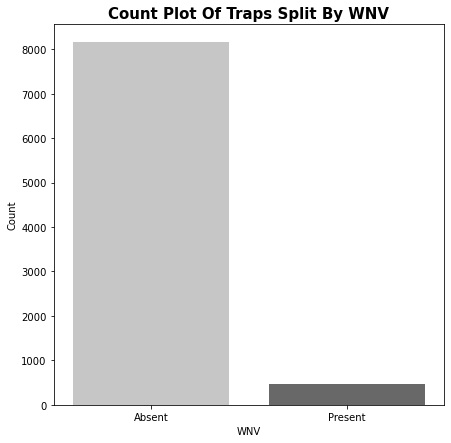

In [26]:
# visualise count plot of wnv column
plt.figure(figsize=(7, 7))
sns.countplot(data=trap_weather, x='WnvPresent', palette='Greys')
plt.title('Count Plot Of Traps Split By WNV', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('WNV');

plt.savefig('../plots/traps-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: This is a case of an imbalanced classification problem. There are many more traps with WNV absent (95% of total) than traps with WNV present (5% of total). The number of traps with WNV absent (majority class) outweighs the number of traps with WNV present (minority class) by 19:1.

### Categorical Feature Visualisations

#### Mosquito Species

In [27]:
# generate count and proportion for species column
pd.DataFrame({'Mosquito Species': trap_weather['Species'].value_counts().index, 
              'Trap Count': trap_weather['Species'].value_counts().values, 
              'Trap Proportion': trap_weather['Species'].value_counts(normalize=True).values})

Mosquito Species  Trap Count  Trap Proportion
0  CULEX PIPIENS/RESTUANS        3899         0.452846
1          CULEX RESTUANS        2409         0.279791
2           CULEX PIPIENS        1996         0.231823
3         CULEX TERRITANS         216         0.025087
4        CULEX SALINARIUS          83         0.009640
5          CULEX TARSALIS           6         0.000697
6         CULEX ERRATICUS           1         0.000116

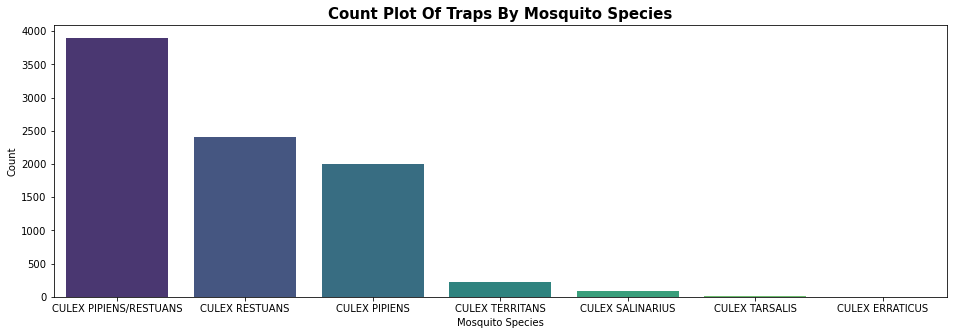

In [28]:
# visualise count plot of species column
plt.figure(figsize=(16, 5))
sns.countplot(data=trap_weather, x='Species', 
              order=trap_weather['Species'].value_counts().index, palette='viridis')
plt.title('Count Plot Of Traps By Mosquito Species', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Mosquito Species');

plt.savefig('../plots/species.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: There are 7 possible species/species combinations in the traps but there are only 6 unique species across all the traps. Culex Restuans and Culex Pipiens were the 2 most common species of mosquitoes; traps containing a mixture of both species accounted for 45% of all traps. Individually, traps with just Culex Restuans made up 28% of the total while traps with just Culex Pipiens made up 23% of the total.

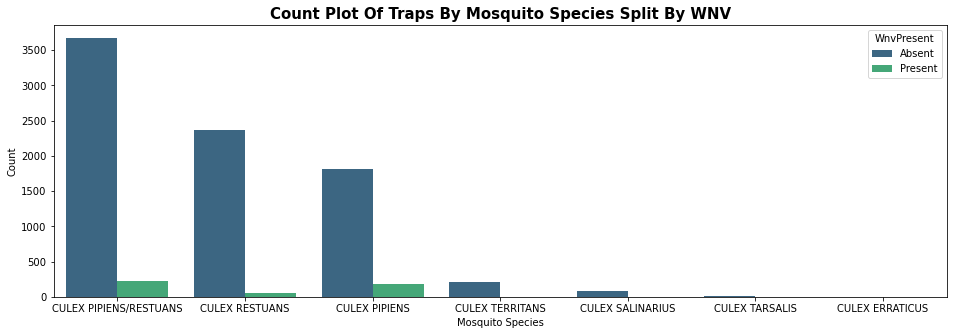

In [29]:
# visualise count plot of species column split by wnv
plt.figure(figsize=(16, 5))
sns.countplot(data=trap_weather, x='Species', hue='WnvPresent', 
              order=trap_weather['Species'].value_counts().index, palette='viridis')
plt.title('Count Plot Of Traps By Mosquito Species Split By WNV', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Mosquito Species');

plt.savefig('../plots/species-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: By comparing traps that just contain Culex Restuans solely and traps that just contain Culex Pipiens solely, it seems that Culex Pipiens traps have a higher proportion of positive WNV cases to negative WNV cases than Culex Restuans traps. This could suggest that Culex Pipiens mosquitoes are more likely to carry the WNV than Culex Restuans mosquitoes.

#### Trap ID

In [30]:
# generate count and proportion for trap column
pd.DataFrame({'Trap ID': trap_weather['Trap'].value_counts().index, 
              'Trap Count': trap_weather['Trap'].value_counts().values, 
              'Trap Proportion': trap_weather['Trap'].value_counts(normalize=True).values})

Trap ID  Trap Count  Trap Proportion
0      T900         182         0.021138
1      T115         158         0.018351
2      T135         153         0.017770
3      T002         150         0.017422
4      T151         144         0.016725
..      ...         ...              ...
131    T078           6         0.000697
132    T076           5         0.000581
133   T094B           5         0.000581
134    T237           3         0.000348
135    T040           2         0.000232

[136 rows x 3 columns]

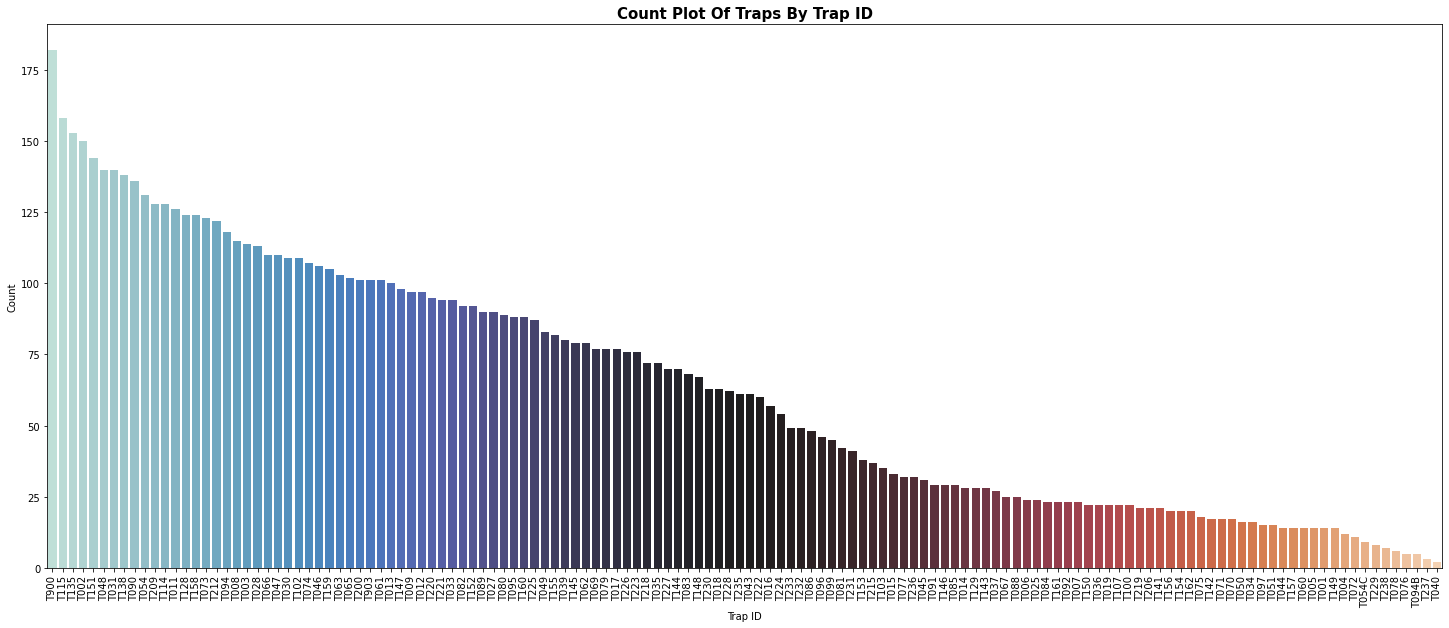

In [31]:
# visualise count plot of trap column
plt.figure(figsize=(25, 10))
sns.countplot(data=trap_weather, x='Trap', 
              order=trap_weather['Trap'].value_counts().index, palette='icefire')
plt.title('Count Plot Of Traps By Trap ID', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Trap ID')
plt.xticks(rotation=90);

plt.savefig('../plots/trap-id.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The number of tests for WNV performed for each trap differs. Some traps are tested more often than other traps, which makes these 'favourited' traps appear more often than other 'unfavourited' traps in the dataset.

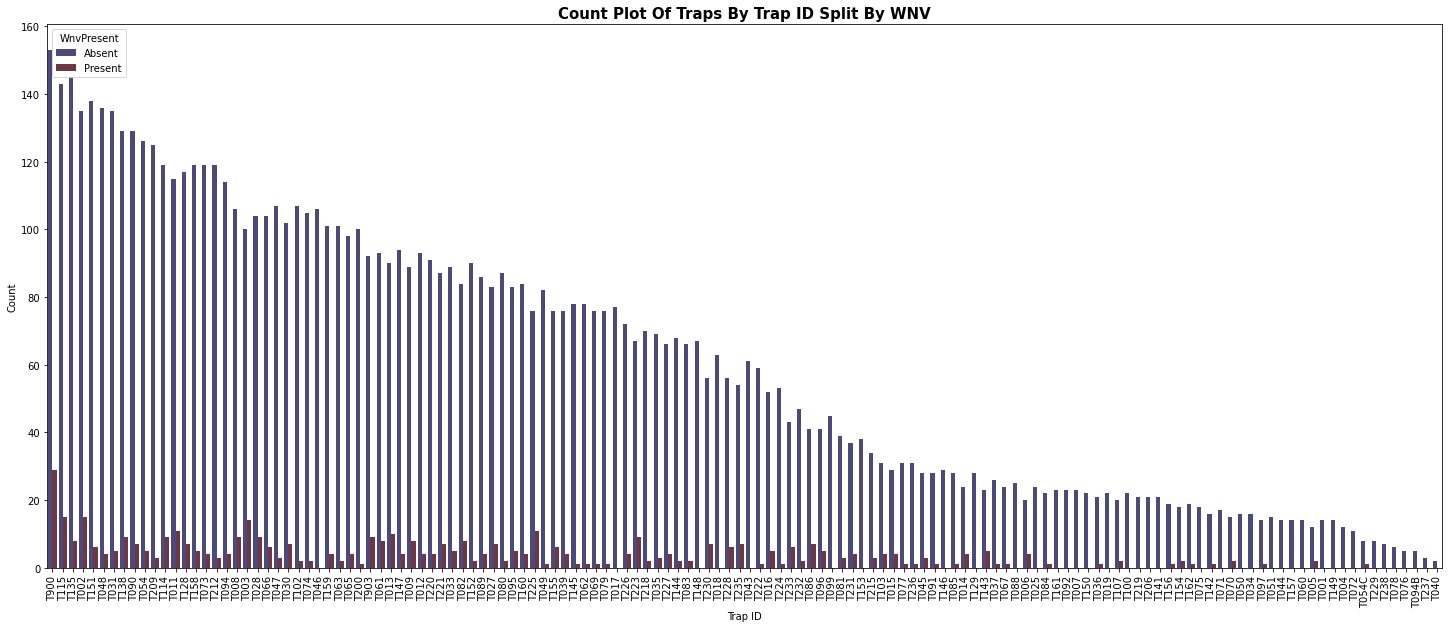

In [32]:
# visualise count plot of trap column split by wnv
plt.figure(figsize=(25, 10))
sns.countplot(data=trap_weather, x='Trap', hue='WnvPresent', 
              order=trap_weather['Trap'].value_counts().index, palette='icefire')
plt.title('Count Plot Of Traps By Trap ID Split By WNV', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Trap ID')
plt.xticks(rotation=90);

plt.savefig('../plots/trap-id-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: Not surprisingly, traps that are tested more often have more positive WNV cases and negative WNV cases than traps that are tested less often.

### Numerical Feature Visualisations

#### Number Of Mosquitoes

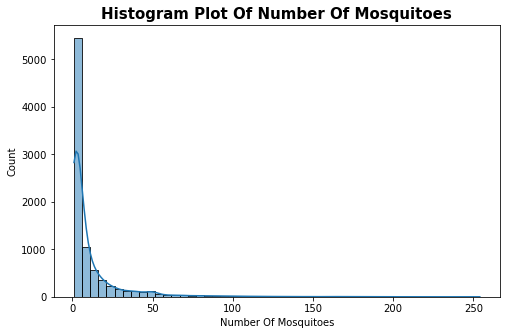

In [33]:
# visualise histogram plot of number of mosquitoes column
plt.figure(figsize=(8, 5))
sns.histplot(data=trap_weather['NumMosquitos'], bins=50, kde=True)
plt.title('Histogram Plot Of Number Of Mosquitoes', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Number Of Mosquitoes');

plt.savefig('../plots/num-mosquitoes.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: There is a positive skew to the distribution with the majority of traps containing a small number of mosquitoes (as seen from the thick left body) and a minority of traps containing a large number of mosquitoes (as seen from the long right tail).

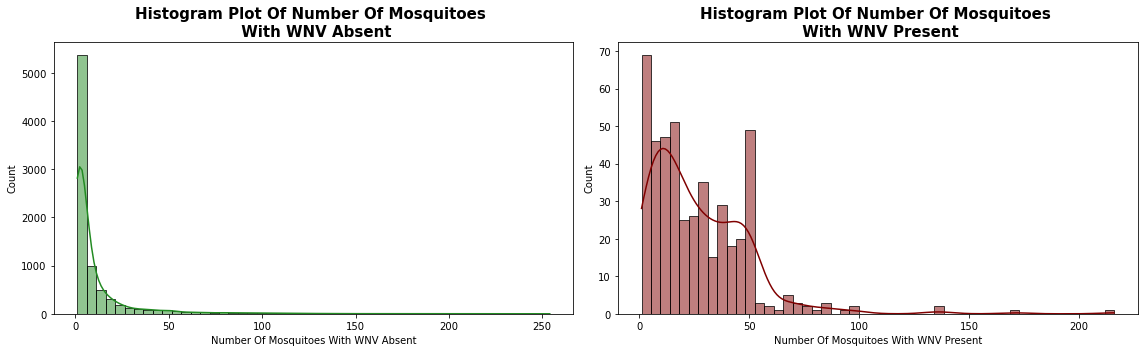

In [34]:
# visualise histogram plots of number of mosquitoes column split by wnv
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent']['NumMosquitos'], 
             bins=50, kde=True, color='forestgreen')
plt.title('Histogram Plot Of Number Of Mosquitoes \n With WNV Absent', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Number Of Mosquitoes With WNV Absent')

plt.subplot(1, 2, 2)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present']['NumMosquitos'], 
             bins=50, kde=True, color='maroon')
plt.title('Histogram Plot Of Number Of Mosquitoes \n With WNV Present', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Number Of Mosquitoes With WNV Present')

plt.tight_layout();

plt.savefig('../plots/num-mosquitoes-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The distribution with WNV absent has a positive skew and looks similar to the previous distribution. This is not unexpected as most of the traps in the dataset are negative for WNV. The distribution with WNV present also has a positive skew, but there is a huge spike in count for traps that have exactly 50 mosquitoes. It could be because during the data collection process, once a trap was found to have more than 50 mosquitoes, it would be recorded with the capped limit of 50, but a second spillover row of the number above 50 was somehow omitted.

#### Daily Average Temperature

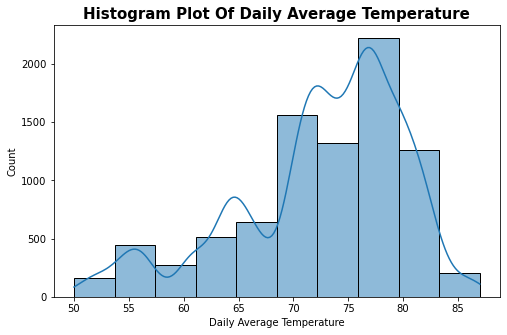

In [35]:
# visualise histogram plot of average temperature column
plt.figure(figsize=(8, 5))
sns.histplot(data=trap_weather['Tavg'], bins=10, kde=True)
plt.title('Histogram Plot Of Daily Average Temperature', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Average Temperature');

plt.savefig('../plots/avg-temp.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: There is a negative skew to the distribution with the majority of traps experiencing a higher temperature (as seen from the thick right body) and a minority of traps experiencing a lower temperature (as seen from the long left tail). This is normal as the data collected spans from late May to early October, which coincides with the whole of summer and a third of autumn. In Chicago, summer's from June to August while autumn's from September to November.

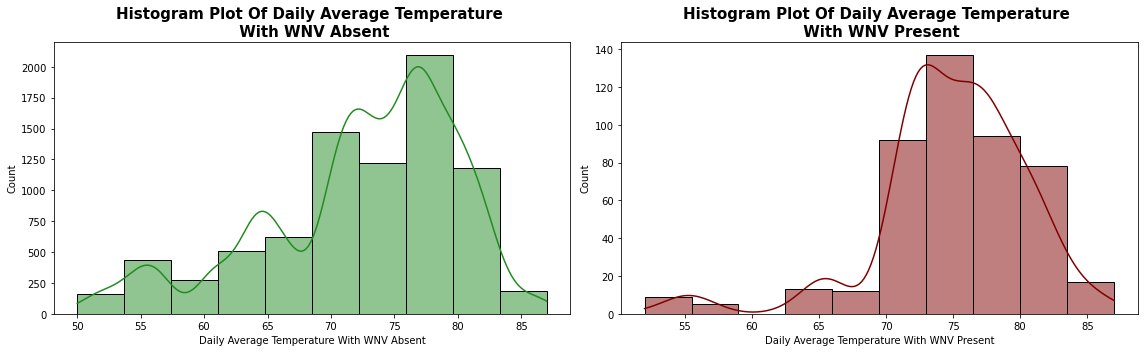

In [36]:
# visualise histogram plots of average temperature column split by wnv
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent']['Tavg'], 
             bins=10, kde=True, color='forestgreen')
plt.title('Histogram Plot Of Daily Average Temperature \n With WNV Absent', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Average Temperature With WNV Absent')

plt.subplot(1, 2, 2)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present']['Tavg'], 
             bins=10, kde=True, color='maroon')
plt.title('Histogram Plot Of Daily Average Temperature \n With WNV Present', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Average Temperature With WNV Present')

plt.tight_layout();

plt.savefig('../plots/avg-temp-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The distribution with WNV absent has a negative skew and looks similar to the previous distribution. This is not unexpected as most of the traps in the dataset are negative for WNV. The distribution with WNV present also has a negative skew, but there appears to be fewer traps for lower temperatures as compared to higher temperatures. This is in line with [research findings](https://www.epa.gov/climate-indicators/climate-change-indicators-west-nile-virus) which showed that warmer temperatures can accelerate mosquito development, biting rates, and the incubation of the disease within a mosquito as compared to cooler temperature.

#### Daily Relative Humidity

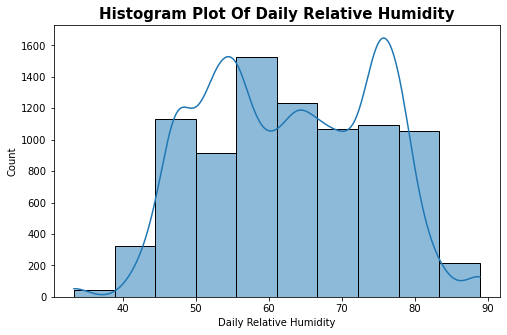

In [37]:
# visualise histogram plot of relative humidity column
plt.figure(figsize=(8, 5))
sns.histplot(data=trap_weather['RH'], bins=10, kde=True)
plt.title('Histogram Plot Of Daily Relative Humidity', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Relative Humidity');

plt.savefig('../plots/relative-humidity.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The distribution appears uniform but also symmetrical with the majority of traps experiencing relative humidities of 45% to 85% and a minority of traps experiencing relative humidities less than 45% or more than 85%. This is normal as the data collected spans from late May to early October, which happens to have August in the middle. In Chicago, August has the highest rainfall, with the months preceding and succeeding it have gradually less rainfall.

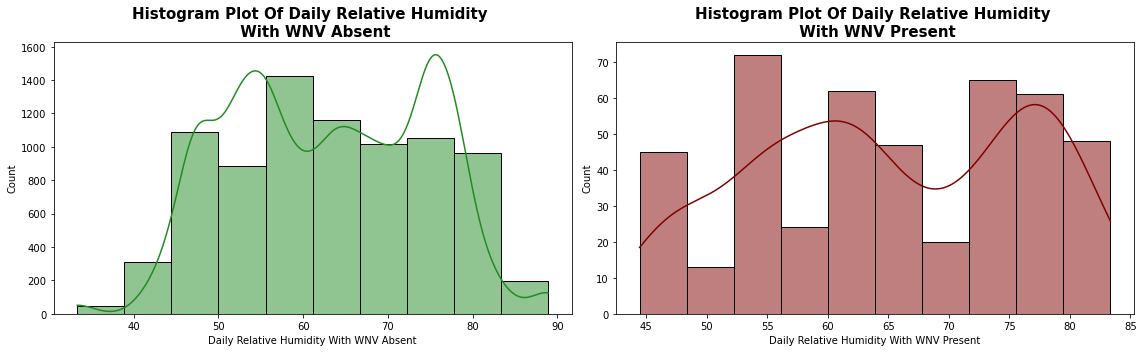

In [38]:
# visualise histogram plots of relative humidity column split by wnv
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent']['RH'], 
             bins=10, kde=True, color='forestgreen')
plt.title('Histogram Plot Of Daily Relative Humidity \n With WNV Absent', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Relative Humidity With WNV Absent')

plt.subplot(1, 2, 2)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present']['RH'], 
             bins=10, kde=True, color='maroon')
plt.title('Histogram Plot Of Daily Relative Humidity \n With WNV Present', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Relative Humidity With WNV Present')

plt.tight_layout();

plt.savefig('../plots/relative-humidity-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The distribution with WNV absent appears uniform but also symmetrical and looks similar to the previous distribution. This is not unexpected as most of the traps in the dataset are negative for WNV. The distribution with WNV present however does not seem to have any discernible shape. It is hard to tell if the WNV is more prevalent under drier climates or wetter climates.

#### Daily Total Precipitation

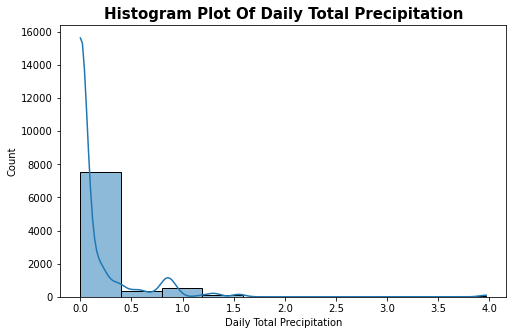

In [39]:
# visualise histogram plot of relative humidity column
plt.figure(figsize=(8, 5))
sns.histplot(data=trap_weather['PrecipTotal'], bins=10, kde=True)
plt.title('Histogram Plot Of Daily Total Precipitation', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Total Precipitation');

plt.savefig('../plots/total-precip.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: There is a positive skew to the distribution with the majority of the data points having low precipitation of less than 1.0 inch (as seen from the thick left body) and a minority with high precipitation (as seen from the long right tail).

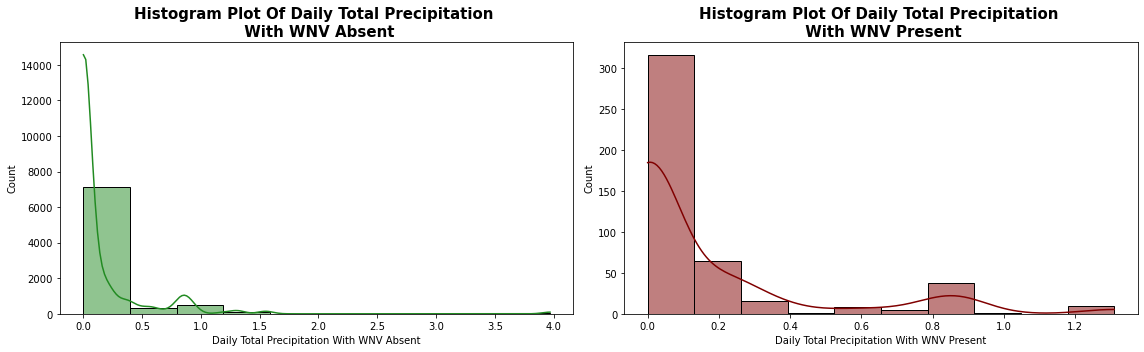

In [40]:
# visualise histogram plots of total precipitation column split by wnv
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent']['PrecipTotal'], 
             bins=10, kde=True, color='forestgreen')
plt.title('Histogram Plot Of Daily Total Precipitation \n With WNV Absent', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Total Precipitation With WNV Absent')

plt.subplot(1, 2, 2)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present']['PrecipTotal'], 
             bins=10, kde=True, color='maroon')
plt.title('Histogram Plot Of Daily Total Precipitation \n With WNV Present', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Total Precipitation With WNV Present')

plt.tight_layout();

plt.savefig('../plots/total-precip-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The distribution of total precipitation with WNV absent has a positive skew and looks similar to the previous distribution. This is not unexpected as most of the data are negative for WNV. The distribution of total precipitation with WNV present has a slightly less positive skew, as seen by the shorter tail. This suggests that WNV is more prevalent in areas with low precipitation.

#### Daily Resultant Wind Speed

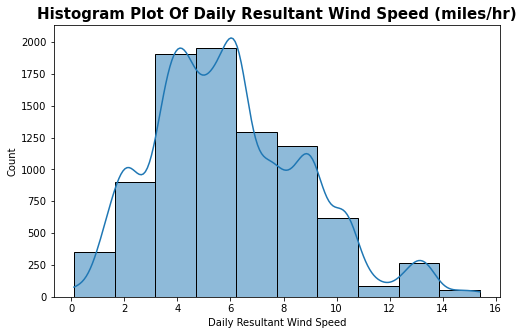

In [41]:
# visualise histogram plot of resultant wind speed column
plt.figure(figsize=(8, 5))
sns.histplot(data=trap_weather['ResultSpeed'], bins=10, kde=True)
plt.title('Histogram Plot Of Daily Resultant Wind Speed (miles/hr)', fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Resultant Wind Speed');

plt.savefig('../plots/resultant-wind-speed.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

In [42]:
# summary statistics of resultant wind speed
trap_weather['ResultSpeed'].describe()

count    8610.000000
mean        5.987340
std         2.876534
min         0.100000
25%         4.000000
50%         5.800000
75%         7.800000
max        15.400000
Name: ResultSpeed, dtype: float64

**Deduction**: There is a slight positive skew to the distribution of resultant wind speed as seen by the slightly higher mean (5.99) when compared to the median (5.80). The resultant wind speed also seem fairly stable as seen by the small standard deviation of 2.87.

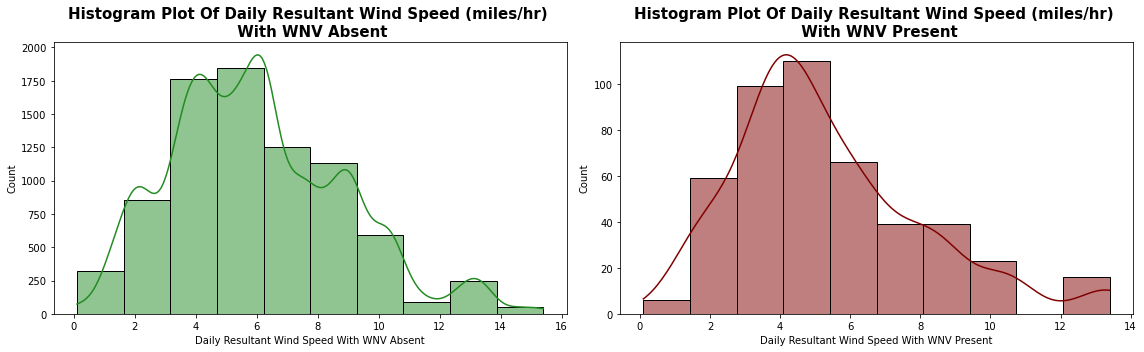

In [43]:
# visualise histogram plots of resultant wind speed column split by wnv
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent']['ResultSpeed'], 
             bins=10, kde=True, color='forestgreen')
plt.title('Histogram Plot Of Daily Resultant Wind Speed (miles/hr) \n With WNV Absent', 
          fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Resultant Wind Speed With WNV Absent')

plt.subplot(1, 2, 2)
sns.histplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present']['ResultSpeed'], 
             bins=10, kde=True, color='maroon')
plt.title('Histogram Plot Of Daily Resultant Wind Speed (miles/hr) \n With WNV Present', 
          fontweight='bold', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Daily Resultant Wind Speed With WNV Present')

plt.tight_layout();

plt.savefig('../plots/resultant-wind-speed-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

In [44]:
# summary statistics of resultant wind speed split by wnv
trap_weather.groupby('WnvPresent')['ResultSpeed'].describe()

count      mean       std  min  25%  50%  75%   max
WnvPresent                                                      
Absent      8153.0  6.021747  2.880513  0.1  4.0  5.8  7.8  15.4
Present      457.0  5.373523  2.735756  0.1  3.5  4.7  6.8  13.4

**Deduction**: The distribution of resultant wind speed with WNV absent has a slight positive skew and looks similar to the previous distribution. This is not unexpected as most of the data are negative for WNV. The distribution of resultant wind speed with WNV present has a greater positive skew, as seen by the longer tail. The mean and median resultant wind speed for cases where WNV is present is lower than when WNV is absent. This means that traps detected with WNV generally had lower resultant wind speed on that day.

### Numerical Feature-Categorical Feature Visualisations

#### Number Of Mosquitoes vs Mosquito Species

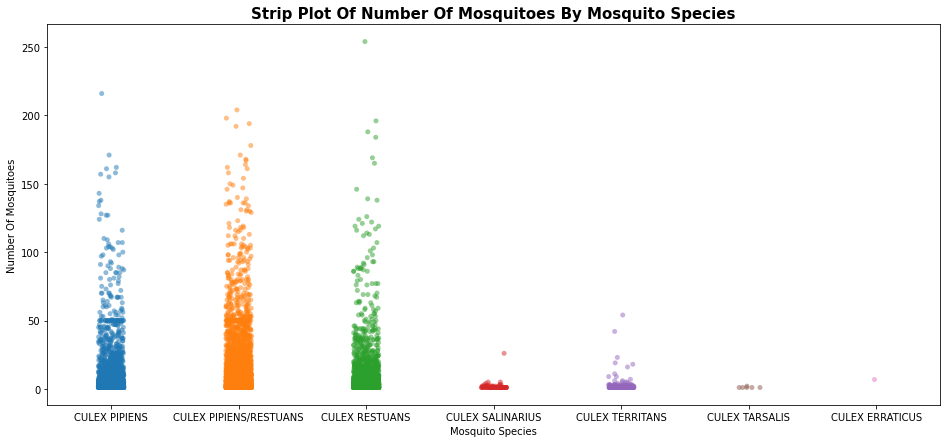

In [45]:
# visualise strip plot of number of mosquitoes column against species column
plt.figure(figsize=(16, 7))
sns.stripplot(data=trap_weather, x='Species', y='NumMosquitos', jitter=True, alpha=0.5)
plt.title('Strip Plot Of Number Of Mosquitoes By Mosquito Species', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Mosquito Species');

plt.savefig('../plots/num-mosquitoes-species.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The predominant species of mosquitoes are Culex Restuans and Culex Pipiens. The number of mosquitoes in traps that capture one or both of these species can range from one digit to three digits. The marginal species of mosquitoes are Culex Salinarius, Culex Territans, Culex Tarsalis, and Culex Erraticus. The number of mosquitoes in traps that capture any one of these species range from one digit to not more than two digits.

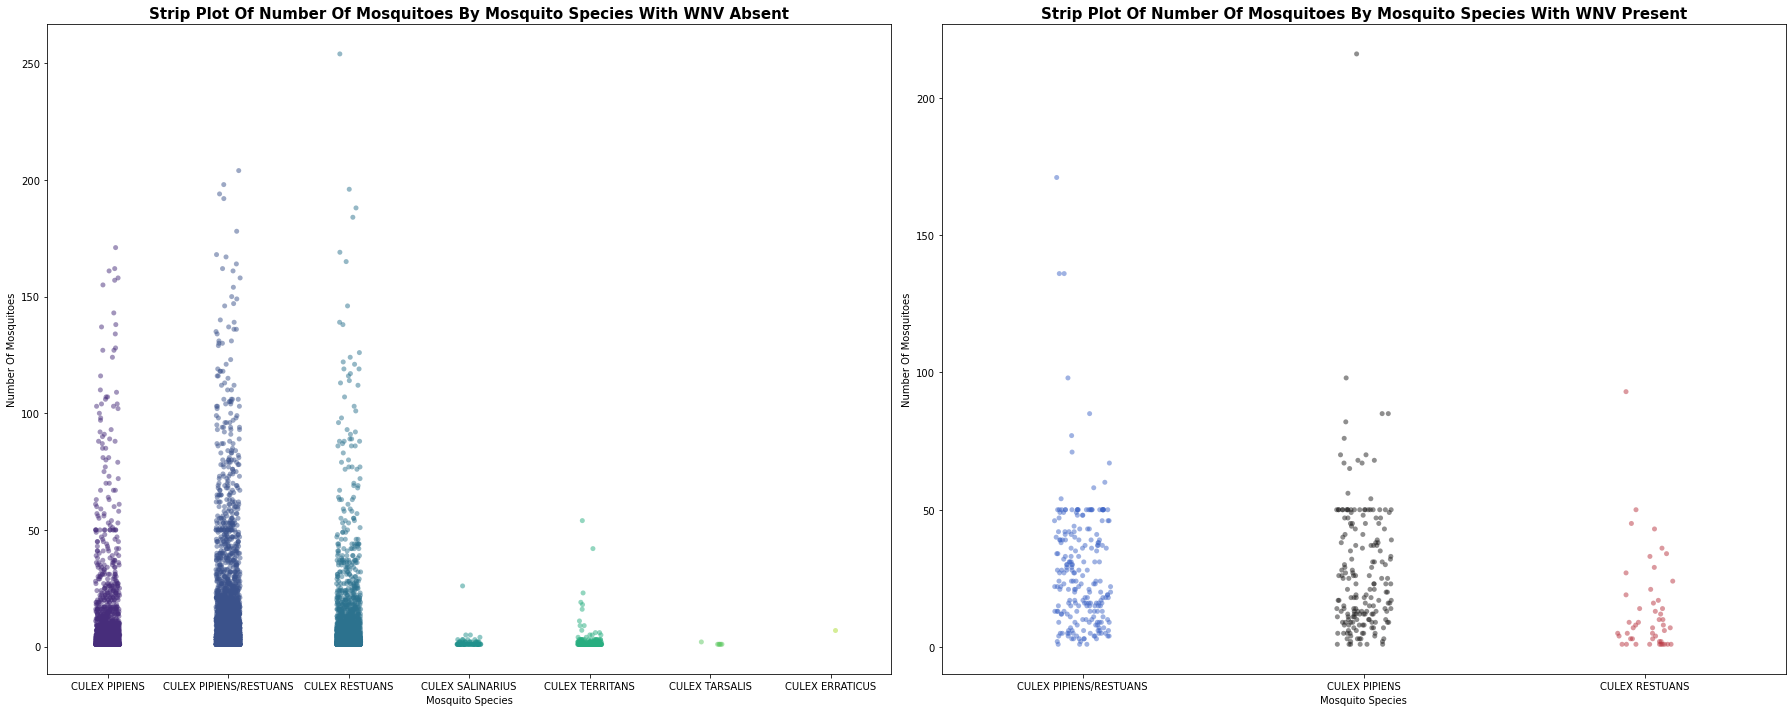

In [46]:
# visualise strip plots of number of mosquitoes column against species column split by wnv
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.stripplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent'], 
              x='Species', y='NumMosquitos', jitter=True, alpha=0.5, palette='viridis')
plt.title('Strip Plot Of Number Of Mosquitoes By Mosquito Species With WNV Absent', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Mosquito Species')

plt.subplot(1, 2, 2)
sns.stripplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present'], 
              x='Species', y='NumMosquitos', jitter=True, alpha=0.5, palette='icefire')
plt.title('Strip Plot Of Number Of Mosquitoes By Mosquito Species With WNV Present', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Mosquito Species')

plt.tight_layout();

plt.savefig('../plots/num-mosquitoes-species-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: All of the traps that were positive for WNV had 1 of these 2 species of mosquitoes: Culex Restuans and Culex Pipiens. None of the traps that were positive for WNV had any of these 4 species of mosquitoes: Culex Salinarius, Culex Territans, Culex Tarsalis, and Culex Erraticus. This could suggest that the WNV is transmitted only by Culex Restuans and Culex Pipiens. However, it cannot be concluded that Culex Salinarius, Culex Territans, Culex Tarsalis, and Culex Erraticus are not capable of transmitting WNV as their numbers are small. Hence, species would be one variable that we are interested to investigate in our model.

#### Number Of Mosquitoes vs Trap ID

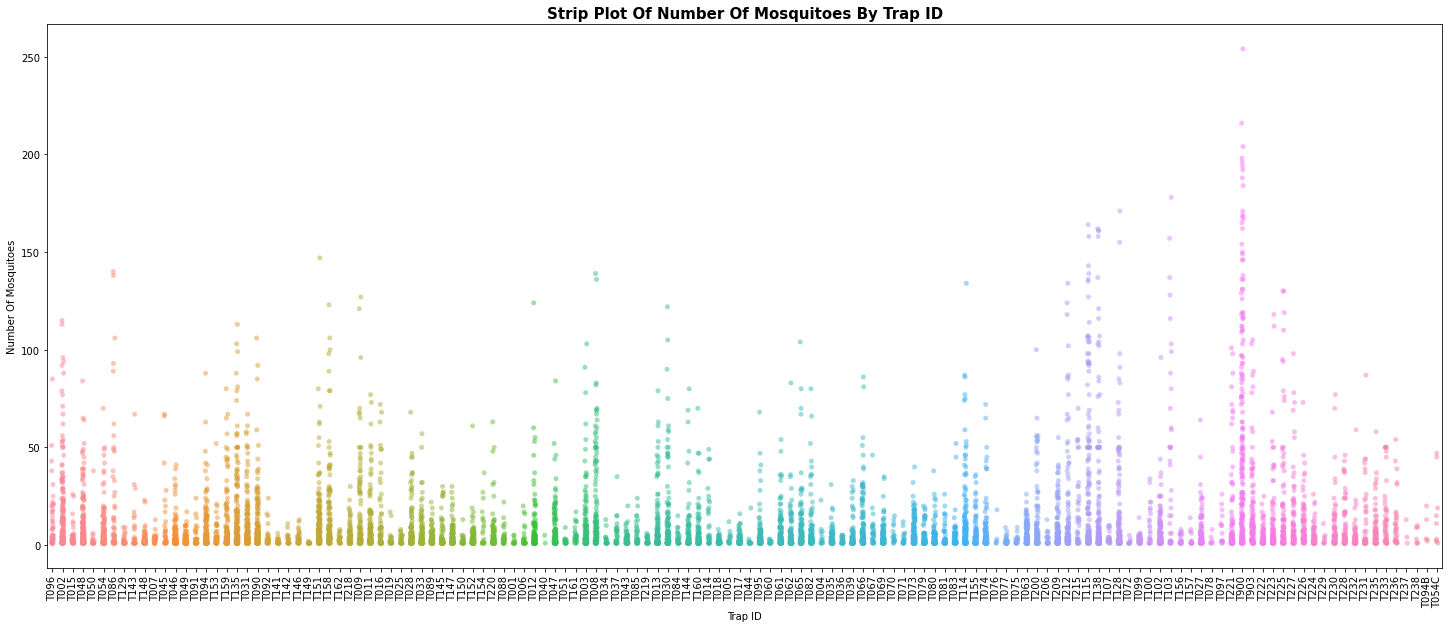

In [47]:
# visualise strip plot of number of mosquitoes column against trap column
plt.figure(figsize=(25, 10))
sns.stripplot(data=trap_weather, x='Trap', y='NumMosquitos', jitter=True, alpha=0.5)
plt.title('Strip Plot Of Number Of Mosquitoes By Trap ID', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Trap ID')
plt.xticks(rotation=90);

plt.savefig('../plots/num-mosquitoes-by-trap-id.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: T900 trapped the most number of mosquitos (~250). However, there are too many traps and there does not seem to be any specific pattern that we could observe here.

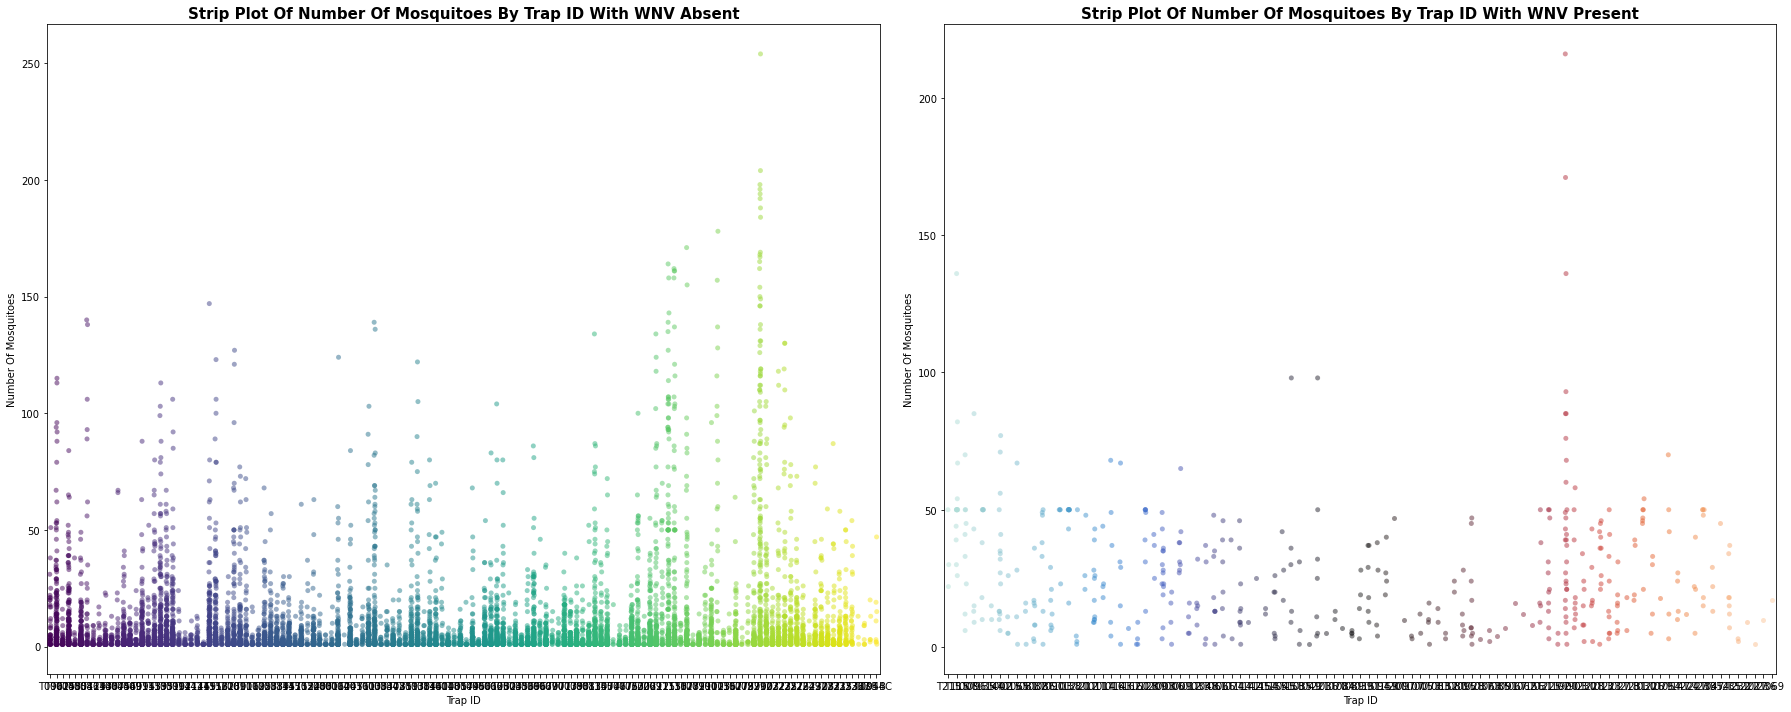

In [48]:
# visualise strip plots of number of mosquitoes column against trap column split by wnv
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.stripplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent'], 
              x='Trap', y='NumMosquitos', jitter=True, alpha=0.5, palette='viridis')
plt.title('Strip Plot Of Number Of Mosquitoes By Trap ID With WNV Absent', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Trap ID')

plt.subplot(1, 2, 2)
sns.stripplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present'], 
              x='Trap', y='NumMosquitos', jitter=True, alpha=0.5, palette='icefire')
plt.title('Strip Plot Of Number Of Mosquitoes By Trap ID With WNV Present', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Trap ID')

plt.tight_layout();

plt.savefig('../plots/trap-id-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: These do not appear to be very helpful.

### Numerical Feature-Numerical Feature Visualisations

#### Number Of Mosquitoes vs Daily Average Temperature

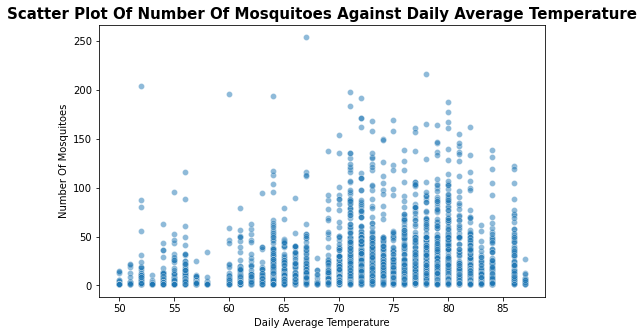

In [49]:
# visualise scatter plot of number of mosquitoes column against average temperature column
plt.figure(figsize=(8, 5))
sns.scatterplot(data=trap_weather, x='Tavg', y='NumMosquitos', alpha=0.5)
plt.title('Scatter Plot Of Number Of Mosquitoes Against Daily Average Temperature', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Daily Average Temperature');

plt.savefig('../plots/num-mosquitoes-avg-temp.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: There is always a baseline number of mosquitoes in the traps regardless of the daily average temperature. However, at higher daily average temperatures, there is a greater chance of seeing a bigger number of mosquitoes in the traps. This makes sense as mosquitoes tend to thrive better under hot tropical conditions as compared to cold temperate conditions.

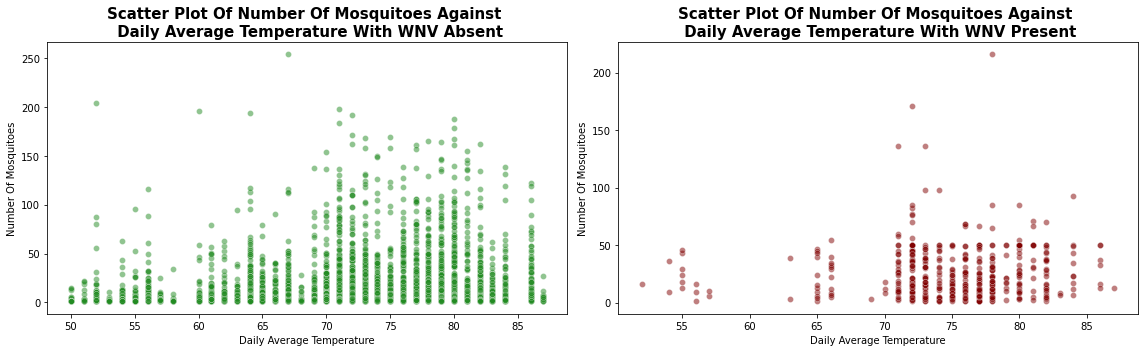

In [50]:
# visualise scatter plots of number of mosquitoes column against average temperature column split by wnv
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent'], 
                x='Tavg', y='NumMosquitos', alpha=0.5, color='forestgreen')
plt.title('Scatter Plot Of Number Of Mosquitoes Against \n Daily Average Temperature With WNV Absent', 
          fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Daily Average Temperature')

plt.subplot(1, 2, 2)
sns.scatterplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present'], 
                x='Tavg', y='NumMosquitos', alpha=0.5, color='maroon')
plt.title('Scatter Plot Of Number Of Mosquitoes Against \n Daily Average Temperature With WNV Present', 
          fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Daily Average Temperature')

plt.tight_layout();

plt.savefig('../plots/num-mosquitoes-avg-temp-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The WNV appears to be present more frequently at higher daily average temperatures than lower daily average temperatures.

#### Number Of Mosquitoes vs Daily Relative Humidity

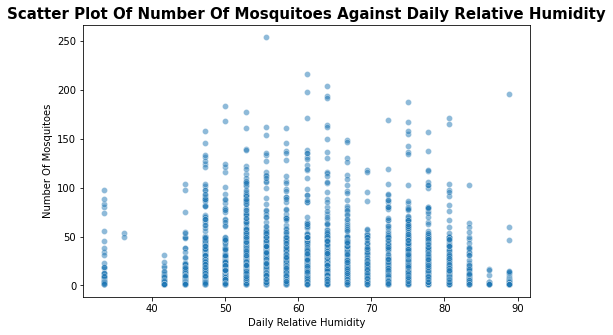

In [51]:
# visualise scatter plot of number of mosquitoes column against relative humidity column
plt.figure(figsize=(8, 5))
sns.scatterplot(data=trap_weather, x='RH', y='NumMosquitos', alpha=0.5)
plt.title('Scatter Plot Of Number Of Mosquitoes Against Daily Relative Humidity', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Daily Relative Humidity');

plt.savefig('../plots/num-mosquitoes-RH.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: There is always a baseline number of mosquitoes in the traps regardless of the daily relative humidity. However, there seems to be a certain ideal daily relative humidity where there will be the biggest number of mosquitoes in the traps. At extremes of daily relative humidity, there tends to be a smaller number of mosquitoes in the traps. This could suggest that mosquitoes need conditions that are not too dry and arid or too wet and moist to propagate.

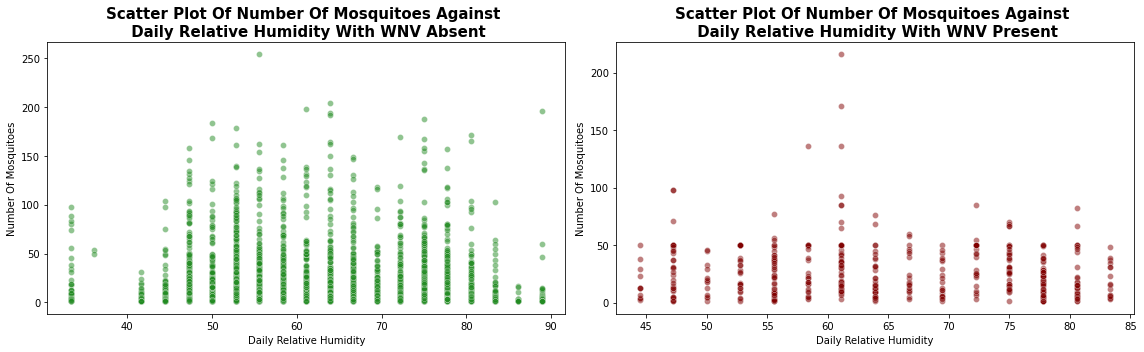

In [52]:
# visualise scatter plots of number of mosquitoes column against relative humidity column split by wnv
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent'], 
                x='RH', y='NumMosquitos', alpha=0.5, color='forestgreen')
plt.title('Scatter Plot Of Number Of Mosquitoes Against \n Daily Relative Humidity With WNV Absent', 
          fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Daily Relative Humidity')

plt.subplot(1, 2, 2)
sns.scatterplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present'], 
                x='RH', y='NumMosquitos', alpha=0.5, color='maroon')
plt.title('Scatter Plot Of Number Of Mosquitoes Against \n Daily Relative Humidity With WNV Present', 
          fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Daily Relative Humidity')

plt.tight_layout();

plt.savefig('../plots/num-mosquitoes-RH-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The WNV appears to be present in equal likelihood irrespective of the daily average humidity.

#### Number Of Mosquitoes vs Daily Total Precipitation¶

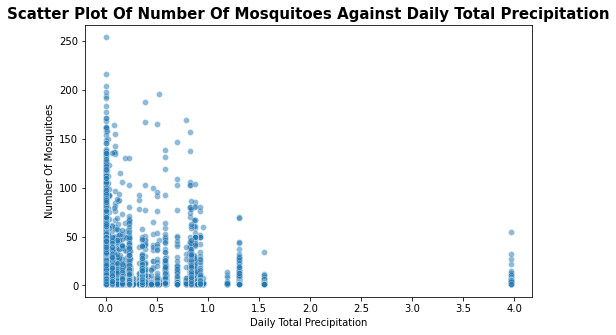

In [53]:
# visualise scatter plot of number of mosquitoes column against total precipitation column
plt.figure(figsize=(8, 5))
sns.scatterplot(data=trap_weather, x='PrecipTotal', y='NumMosquitos', alpha=0.5)
plt.title('Scatter Plot Of Number Of Mosquitoes Against Daily Total Precipitation', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Daily Total Precipitation');

plt.savefig('../plots/num-mosquitoes-total-precip.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: Most of the mosquitos seem to appear on days where total precipitation is < 1.5 inches. There were no mosquitos present for total precipitation between 2 - 3.5 inches but some mosquitos were present where total precipitation is 4 inches. This seem like an outlier.

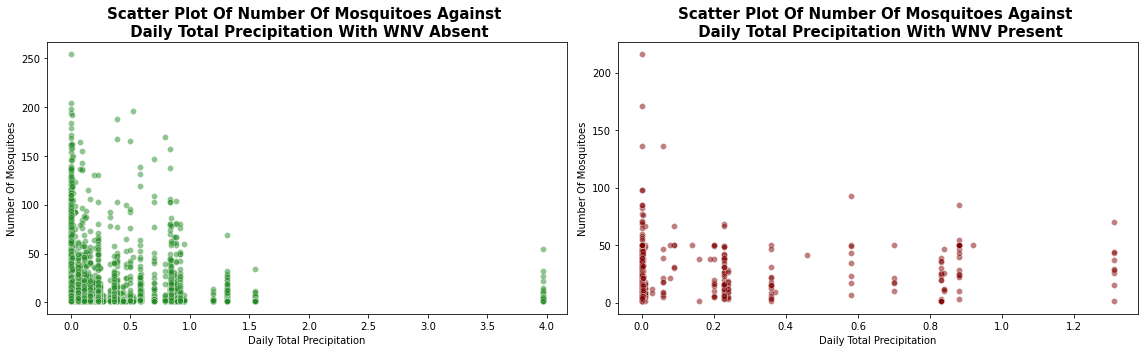

In [54]:
# visualise scatter plots of number of mosquitoes column against total precipitation column split by wnv
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=trap_weather[trap_weather['WnvPresent'] == 'Absent'], 
                x='PrecipTotal', y='NumMosquitos', alpha=0.5, color='forestgreen')
plt.title('Scatter Plot Of Number Of Mosquitoes Against \n Daily Total Precipitation With WNV Absent', 
          fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Daily Total Precipitation')

plt.subplot(1, 2, 2)
sns.scatterplot(data=trap_weather[trap_weather['WnvPresent'] == 'Present'], 
                x='PrecipTotal', y='NumMosquitos', alpha=0.5, color='maroon')
plt.title('Scatter Plot Of Number Of Mosquitoes Against \n Daily Total Precipitation With WNV Present', 
          fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Daily Total Precipitation')

plt.tight_layout();

plt.savefig('../plots/num-mosquitoes-total-precip-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: There does not seem to be an obvious relationship between total precipitation and the presence of WNV. Generally the spread of mosquitos appear when precipitation is <= 1.5 inches.

### Feature-Target Visualisations

#### Number Of Mosquitoes vs West Nile Virus

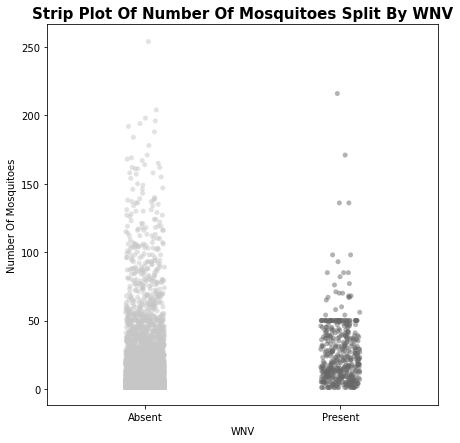

In [55]:
# visualise strip plot of number of mosquitoes column against wnv column
plt.figure(figsize=(7, 7))
sns.stripplot(data=trap_weather, x='WnvPresent', y='NumMosquitos', jitter=True, alpha=0.5, palette='Greys')
plt.title('Strip Plot Of Number Of Mosquitoes Split By WNV', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('WNV');

plt.savefig('../plots/num-mosquitoes-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The WNV seems to be more common in traps with a smaller number of mosquitoes than bigger number of mosquitoes.

#### Daily Average Temperature vs West Nile Virus

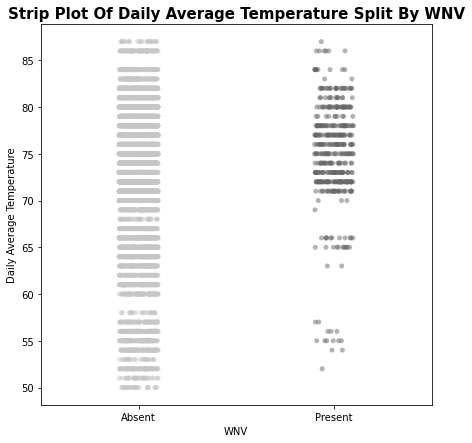

In [56]:
# visualise strip plot of average temperature column against wnv column
plt.figure(figsize=(7, 7))
sns.stripplot(data=trap_weather, x='WnvPresent', y='Tavg', jitter=True, alpha=0.5, palette='Greys')
plt.title('Strip Plot Of Daily Average Temperature Split By WNV', fontweight='bold', fontsize=15)
plt.ylabel('Daily Average Temperature')
plt.xlabel('WNV');

plt.savefig('../plots/avg-temperature-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The WNV seems to be more common at higher daily average temperatures than lower daily average temperatures.

#### Daily Relative Humidity vs West Nile Virus

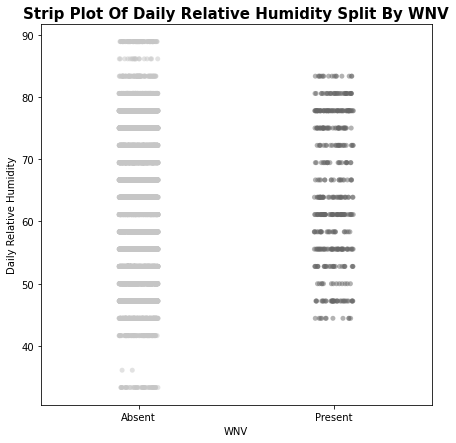

In [57]:
# visualise strip plot of relative humidity column against wnv column
plt.figure(figsize=(7, 7))
sns.stripplot(data=trap_weather, x='WnvPresent', y='RH', jitter=True, alpha=0.5, palette='Greys')
plt.title('Strip Plot Of Daily Relative Humidity Split By WNV', fontweight='bold', fontsize=15)
plt.ylabel('Daily Relative Humidity')
plt.xlabel('WNV');

plt.savefig('../plots/relative-humidity-by-wnv.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: The WNV seems to be more common at a certain narrow band of daily relative humidities.

### Time Series Visualisations

#### West Nile Virus

In [58]:
# undo map temporarily
trap['WnvPresent'] = trap['WnvPresent'].map({'Absent': 0, 'Present': 1})
trap_weather['WnvPresent'] = trap_weather['WnvPresent'].map({'Absent': 0, 'Present': 1})

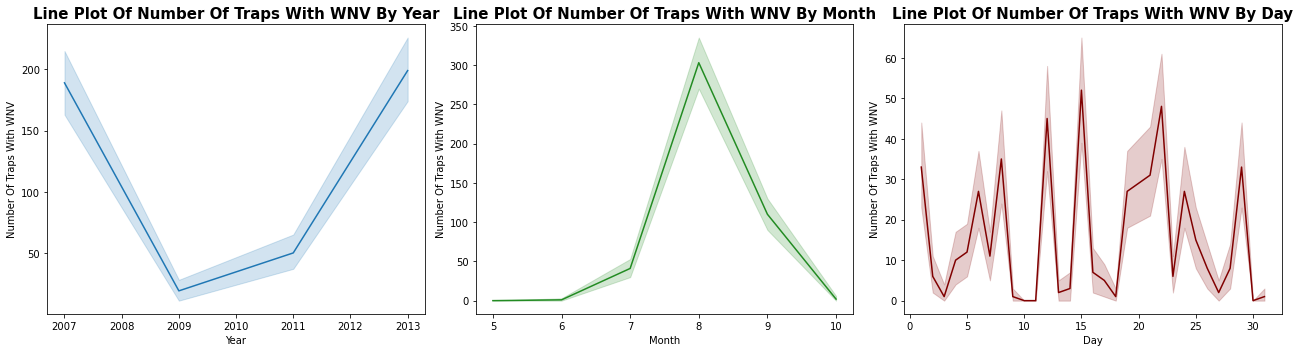

In [59]:
# visualise line plots of wnv column
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=trap_weather, x='Year', y='WnvPresent', estimator='sum')
plt.title('Line Plot Of Number Of Traps With WNV By Year', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Traps With WNV')
plt.xlabel('Year')

plt.subplot(1, 3, 2)
sns.lineplot(data=trap_weather, x='Month', y='WnvPresent', estimator='sum', color='forestgreen')
plt.title('Line Plot Of Number Of Traps With WNV By Month', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Traps With WNV')
plt.xlabel('Month')

plt.subplot(1, 3, 3)
sns.lineplot(data=trap_weather, x='Day', y='WnvPresent', estimator='sum', color='maroon')
plt.title('Line Plot Of Number Of Traps With WNV By Day', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Traps With WNV')
plt.xlabel('Day')

plt.tight_layout();

plt.savefig('../plots/num-traps-by-ymd.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: These line plots sum the number of traps with WNV for each time period in the respective time denomination (i.e. year/month/day). In terms of the year, 2013 recorded the biggest number of traps with WNV while 2009 recorded the smallest. In terms of the month, August had the biggest number of traps with WNV while June had the smallest (May and October are expectedly low as they are partial months). In terms of the day, the pattern is erratic.

In [60]:
# redo map again
trap['WnvPresent'] = trap['WnvPresent'].map({0: 'Absent', 1: 'Present'})
trap_weather['WnvPresent'] = trap_weather['WnvPresent'].map({0: 'Absent', 1: 'Present'})

#### Number Of Mosquitoes

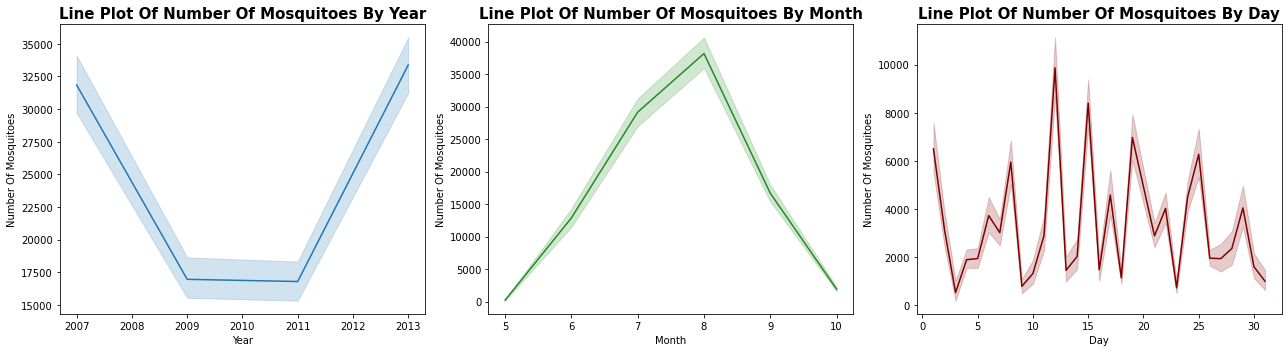

In [61]:
# visualise line plots of number of mosquitoes column
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=trap_weather, x='Year', y='NumMosquitos', estimator='sum')
plt.title('Line Plot Of Number Of Mosquitoes By Year', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Year')

plt.subplot(1, 3, 2)
sns.lineplot(data=trap_weather, x='Month', y='NumMosquitos', estimator='sum', color='forestgreen')
plt.title('Line Plot Of Number Of Mosquitoes By Month', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Month')

plt.subplot(1, 3, 3)
sns.lineplot(data=trap_weather, x='Day', y='NumMosquitos', estimator='sum', color='maroon')
plt.title('Line Plot Of Number Of Mosquitoes By Day', fontweight='bold', fontsize=15)
plt.ylabel('Number Of Mosquitoes')
plt.xlabel('Day')

plt.tight_layout();

plt.savefig('../plots/num-mosquitoes-by-ymd.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: These line plots sum the number of mosquitoes in the traps for each time period in the respective time denomination (i.e. year/month/day). In terms of the year, 2013 recorded the biggest number of mosquitoes while 2011 recorded the smallest. In terms of the month, August had the biggest number of mosquitoes while June had the smallest (May and October are expectedly low as they are partial months). In terms of the day, the pattern is erratic.

#### Daily Average Temperature

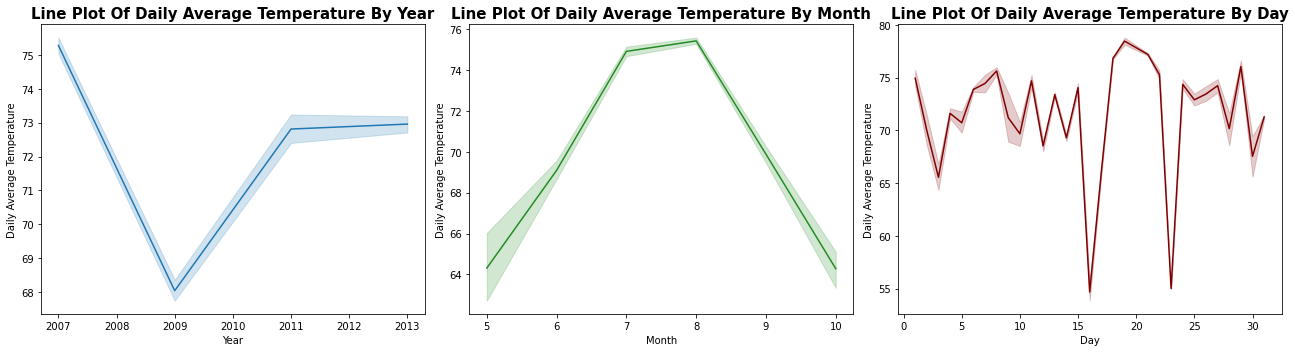

In [62]:
# visualise line plots of average temperature column
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=trap_weather, x='Year', y='Tavg', estimator='mean')
plt.title('Line Plot Of Daily Average Temperature By Year', fontweight='bold', fontsize=15)
plt.ylabel('Daily Average Temperature')
plt.xlabel('Year')

plt.subplot(1, 3, 2)
sns.lineplot(data=trap_weather, x='Month', y='Tavg', estimator='mean', color='forestgreen')
plt.title('Line Plot Of Daily Average Temperature By Month', fontweight='bold', fontsize=15)
plt.ylabel('Daily Average Temperature')
plt.xlabel('Month')

plt.subplot(1, 3, 3)
sns.lineplot(data=trap_weather, x='Day', y='Tavg', estimator='mean', color='maroon')
plt.title('Line Plot Of Daily Average Temperature By Day', fontweight='bold', fontsize=15)
plt.ylabel('Daily Average Temperature')
plt.xlabel('Day')

plt.tight_layout();

plt.savefig('../plots/avg-temperature-by-ymd.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: These line plots average the daily average tempature for each time period in the respective time denomination (i.e. year/month/day). In terms of the year, 2007 recorded the highest daily average temperature while 2009 recorded the lowest. In terms of the month, August had the highest daily average temperature while June had the lowest (May and October should be excluded as they are partial months). In terms of the day, there appears to be 2 sharp dips in daily average temperature on the 16th and 23rd of every month.

#### Daily Relative Humidity

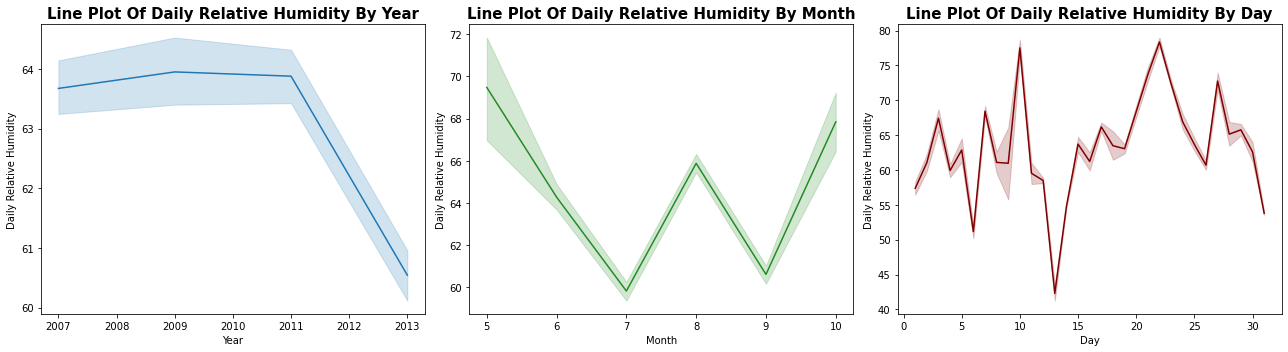

In [63]:
# visualise line plots of relative humidity column
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=trap_weather, x='Year', y='RH', estimator='mean')
plt.title('Line Plot Of Daily Relative Humidity By Year', fontweight='bold', fontsize=15)
plt.ylabel('Daily Relative Humidity')
plt.xlabel('Year')

plt.subplot(1, 3, 2)
sns.lineplot(data=trap_weather, x='Month', y='RH', estimator='mean', color='forestgreen')
plt.title('Line Plot Of Daily Relative Humidity By Month', fontweight='bold', fontsize=15)
plt.ylabel('Daily Relative Humidity')
plt.xlabel('Month')

plt.subplot(1, 3, 3)
sns.lineplot(data=trap_weather, x='Day', y='RH', estimator='mean', color='maroon')
plt.title('Line Plot Of Daily Relative Humidity By Day', fontweight='bold', fontsize=15)
plt.ylabel('Daily Relative Humidity')
plt.xlabel('Day')

plt.tight_layout();

plt.savefig('../plots/relative-humidity-by-ymd.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: These line plots average the daily relative humidity for each time period in the respective time denomination (i.e. year/month/day). In terms of the year, 2009 recorded the highest daily relative humidity while 2013 recorded the lowest. In terms of the month, August had the highest daily relative humidity while July had the lowest (May and October should be excluded as they are partial months). In terms of the day, there appears to be 1 sharp dip in daily relative humidity on the 13th of every month.

### Geographical Visualisations

**Define A Function To Plot The Map Of Chicago**

In [64]:
# define a function to plot the map of chicago

# lon_l = longitude left limit
# lon_r = longitude right limit
# lat_b = latitude bottom limit
# lat_t = latitude top limit

def plot_map(lon_l, lon_r, lat_b, lat_t):
    
    mapdata = np.loadtxt("../assets/input/mapdata_copyright_openstreetmap_contributors.txt")
    
    lon_lat_box = (lon_l, lon_r, lat_b, lat_t)
    aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    
    plt.figure(figsize=(10, 15))
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
    
    plt.xlabel('Longitude', fontweight='bold', fontsize=12)
    plt.ylabel('Latitude', fontweight='bold', fontsize=12)

**Trap Locations**

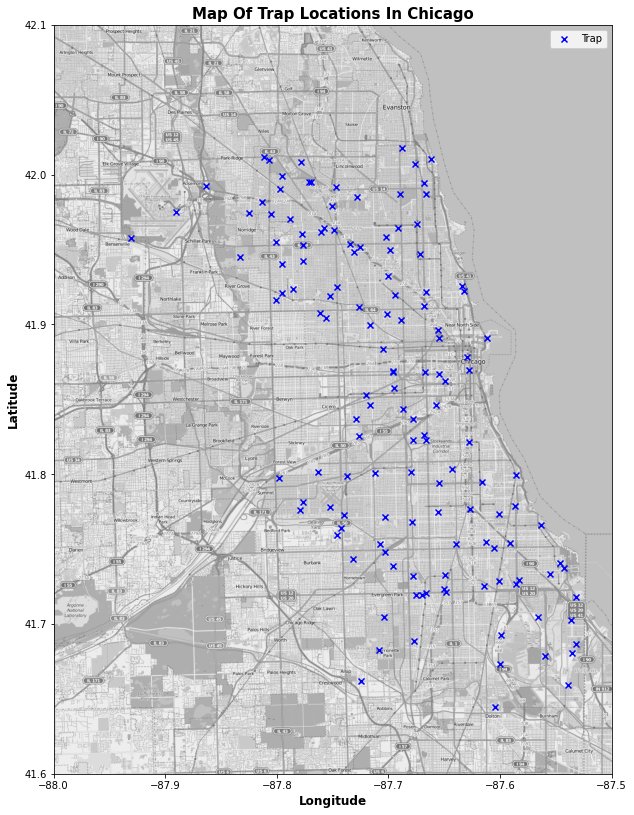

In [65]:
# plot map of chicago
plot_map(-88.0, -87.5, 41.6, 42.1)

# extract coordinates of trap locations
trap_map = trap[['Longitude', 'Latitude']].drop_duplicates().values

# visualise trap locations on the map
plt.scatter(trap_map[:, 0], trap_map[:, 1], marker='x', color='blue', label='Trap')
plt.title('Map Of Trap Locations In Chicago', fontweight='bold', fontsize=15)
plt.legend();

plt.savefig('../plots/trap-map.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

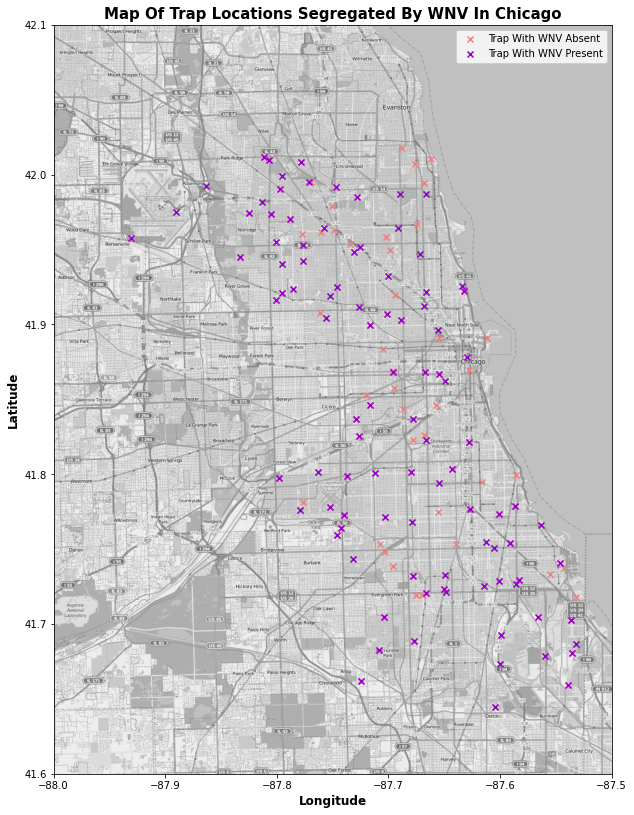

In [66]:
# plot map of chicago
plot_map(-88.0, -87.5, 41.6, 42.1)

# extract coordinates of trap locations differentiated by wnv
trap_no_wnv = trap.loc[trap['WnvPresent'] == 'Absent', ['Longitude', 'Latitude']].drop_duplicates().values
trap_wnv = trap.loc[trap['WnvPresent'] == 'Present', ['Longitude', 'Latitude']].drop_duplicates().values

# visualise trap locations segregated by wnv on the map
plt.scatter(trap_no_wnv[:, 0], trap_no_wnv[:, 1], marker='x', color='lightcoral', label='Trap With WNV Absent')
plt.scatter(trap_wnv[:, 0], trap_wnv[:, 1], marker='x', color='darkviolet', label='Trap With WNV Present')
plt.title('Map Of Trap Locations Segregated By WNV In Chicago', fontweight='bold', fontsize=15)
plt.legend();

plt.savefig('../plots/trap-by-wnv-map.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction:** The traps that have WNV present are dispersed pretty evenly with the traps that have WNV absent. This makes the region which the trap is situated in (e.g. near the coast, away from the sea) to possibly not be a strong predictor of the presence or absence of WNV.

**Weather Station Locations**

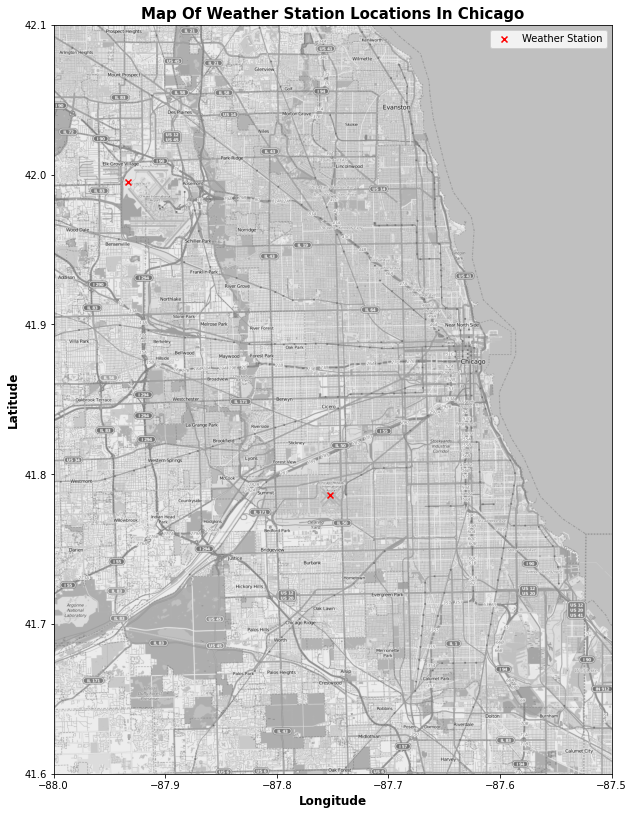

In [67]:
# plot map of chicago
plot_map(-88.0, -87.5, 41.6, 42.1)

# extract coordinates of weather station locations
weather_map = weather[['Longitude', 'Latitude']].drop_duplicates().values

# visualise weather station locations on the map
plt.scatter(weather_map[:, 0], weather_map[:, 1], marker='x', color='red', label='Weather Station')
plt.title('Map Of Weather Station Locations In Chicago', fontweight='bold', fontsize=15)
plt.legend();

plt.savefig('../plots/weather-map.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Trap & Weather Station Locations**

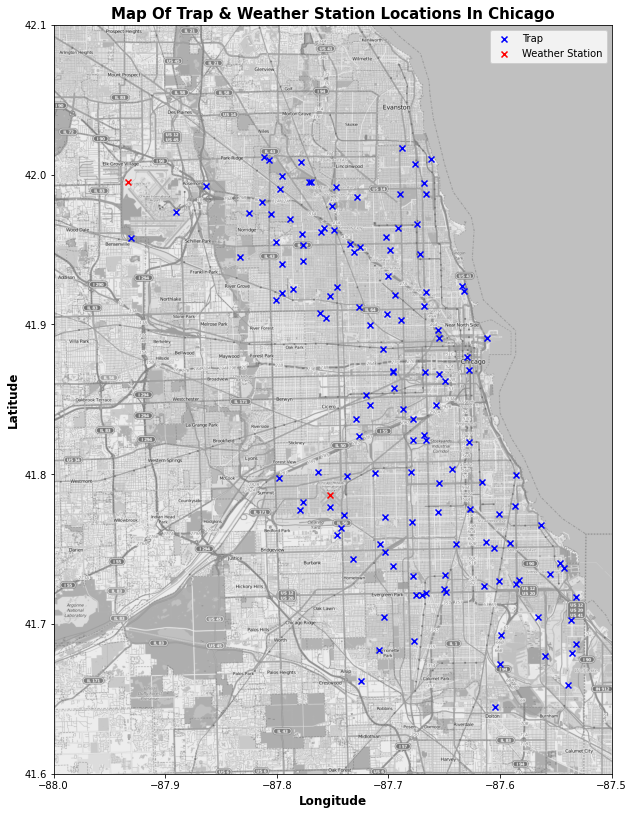

In [68]:
# plot map of chicago
plot_map(-88.0, -87.5, 41.6, 42.1)

# visualise trap & weather station locations on the map
plt.scatter(trap_map[:, 0], trap_map[:, 1], marker='x', color='blue', label='Trap')
plt.scatter(weather_map[:, 0], weather_map[:, 1], marker='x', color='red', label='Weather Station')
plt.title('Map Of Trap & Weather Station Locations In Chicago', fontweight='bold', fontsize=15)
plt.legend();

plt.savefig('../plots/trap-weather-map.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction:** The traps can be assigned to 1 of 2 weather stations to get the weather readings of the trap for the day.

**Spray Locations**

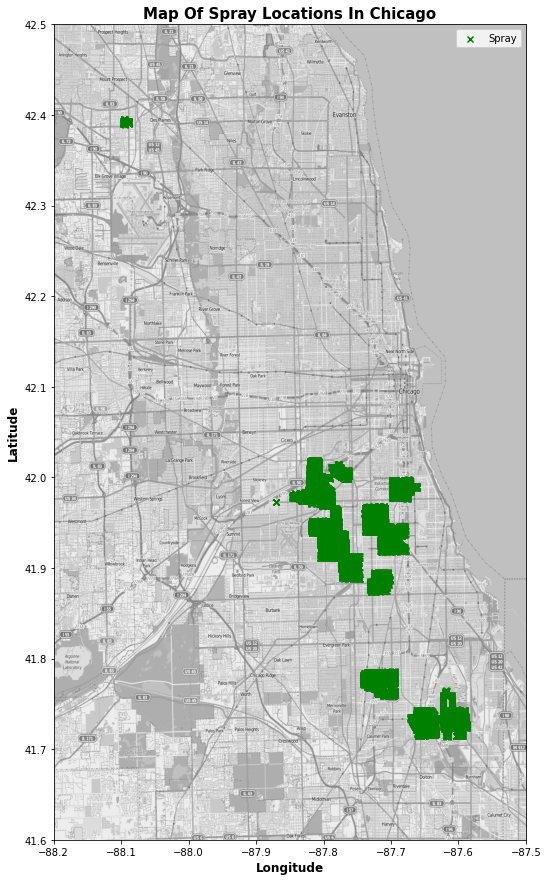

In [69]:
# plot map of chicago
plot_map(-88.2, -87.5, 41.6, 42.5)

# extract coordinates of spray locations
spray_map = spray[['Longitude', 'Latitude']].drop_duplicates().values

# visualise spray locations on the map
plt.scatter(spray_map[:, 0], spray_map[:, 1], marker='x', color='green', label='Spray')
plt.title('Map Of Spray Locations In Chicago', fontweight='bold', fontsize=15)
plt.legend();

plt.savefig('../plots/spray-map.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

Shape Before Dropping Outlying Spray Locations: (14294, 7)
Shape After Dropping Outlying Spray Locations: (14199, 7)


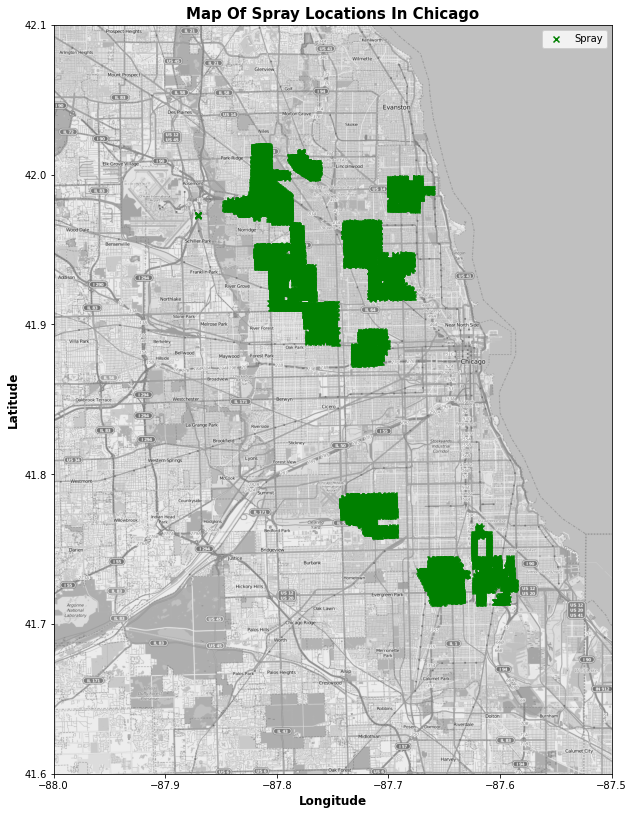

In [70]:
# drop spray locations that do not coincide with trap locations
print('Shape Before Dropping Outlying Spray Locations:', spray.shape)
spray = spray[(spray['Latitude'] < 42.1) & (spray['Longitude'] > -87.9)]
print('Shape After Dropping Outlying Spray Locations:', spray.shape)

# plot map of chicago
plot_map(-88.0, -87.5, 41.6, 42.1)

# extract coordinates of spray locations
spray_map = spray[['Longitude', 'Latitude']].drop_duplicates().values

# visualise spray locations on the map
plt.scatter(spray_map[:, 0], spray_map[:, 1], marker='x', color='green', label='Spray')
plt.title('Map Of Spray Locations In Chicago', fontweight='bold', fontsize=15)
plt.legend();

plt.savefig('../plots/spray-map-focused.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Spray & Trap Locations**

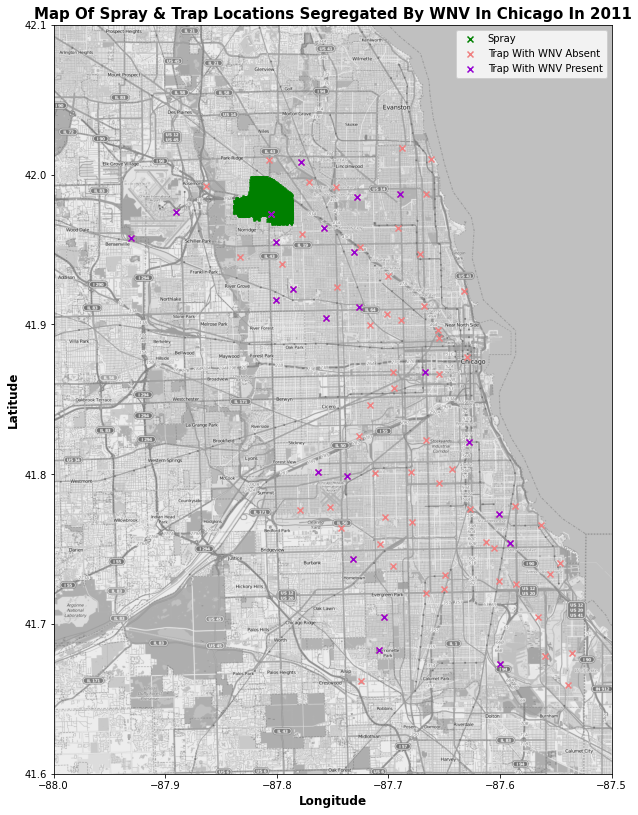

In [71]:
# plot map of chicago
plot_map(-88.0, -87.5, 41.6, 42.1)

# extract coordinates of spray locations in 2011
spray_2011 = spray[spray['Date'].str.contains('2011')]
spray_map_2011 = spray_2011[['Longitude', 'Latitude']].drop_duplicates().values

# extract coordinates of trap locations differentiated by wnv in 2011
trap_2011 = trap[trap['Date'].str.contains('2011')]
trap_no_wnv_2011 = trap_2011.loc[trap['WnvPresent'] == 'Absent', ['Longitude', 'Latitude']].drop_duplicates().values
trap_wnv_2011 = trap_2011.loc[trap['WnvPresent'] == 'Present', ['Longitude', 'Latitude']].drop_duplicates().values

# visualise spray & trap locations segregated by wnv on the map
plt.scatter(spray_map_2011[:, 0], spray_map_2011[:, 1], marker='x', color='green', label='Spray')
plt.scatter(trap_no_wnv_2011[:, 0], trap_no_wnv_2011[:, 1], marker='x', color='lightcoral', label='Trap With WNV Absent')
plt.scatter(trap_wnv_2011[:, 0], trap_wnv_2011[:, 1], marker='x', color='darkviolet', label='Trap With WNV Present')
plt.title('Map Of Spray & Trap Locations Segregated By WNV In Chicago In 2011', fontweight='bold', fontsize=15)
plt.legend();

plt.savefig('../plots/spray-trap-by-wnv-2011-map.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction:** In 2011, the sprays were concentrated at one area in the city only and covered just one trap. While the trap was tested positive for WNV, it is uncertain if the trap was tested for WNV before or after the spray efforts in the area. 

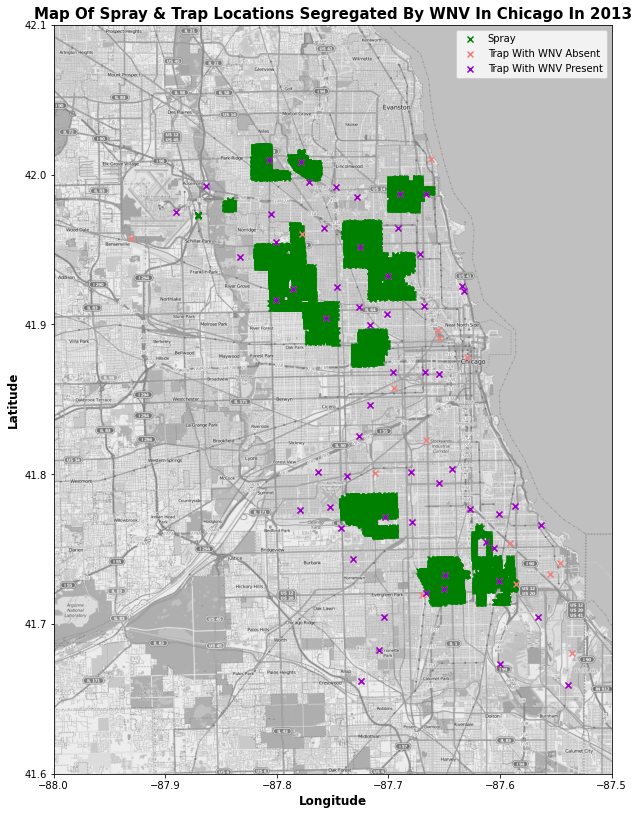

In [72]:
# plot map of chicago
plot_map(-88.0, -87.5, 41.6, 42.1)

# extract coordinates of spray locations in 2013
spray_2013 = spray[spray['Date'].str.contains('2013')]
spray_map_2013 = spray_2013[['Longitude', 'Latitude']].drop_duplicates().values

# extract coordinates of trap locations differentiated by wnv in 2013
trap_2013 = trap[trap['Date'].str.contains('2013')]
trap_no_wnv_2013 = trap_2013.loc[trap['WnvPresent'] == 'Absent', ['Longitude', 'Latitude']].drop_duplicates().values
trap_wnv_2013 = trap_2013.loc[trap['WnvPresent'] == 'Present', ['Longitude', 'Latitude']].drop_duplicates().values

# visualise spray & trap locations segregated by wnv on the map
plt.scatter(spray_map_2013[:, 0], spray_map_2013[:, 1], marker='x', color='green', label='Spray')
plt.scatter(trap_no_wnv_2013[:, 0], trap_no_wnv_2013[:, 1], marker='x', color='lightcoral', label='Trap With WNV Absent')
plt.scatter(trap_wnv_2013[:, 0], trap_wnv_2013[:, 1], marker='x', color='darkviolet', label='Trap With WNV Present')
plt.title('Map Of Spray & Trap Locations Segregated By WNV In Chicago In 2013', fontweight='bold', fontsize=15)
plt.legend();

plt.savefig('../plots/spray-trap-by-wnv-2013-map.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction:** In 2013, the sprays were spread across multiple areas in the city and covered many traps. It is uncertain if the traps were tested for WNV before or after the spray efforts in the area. However, it appears that most of the traps that resided within the spray clusters were positive for WNV.

#### Frequency of Sprays

In [73]:
# get the number of unique days where sprays were conducted
spray['Date'].unique()

array(['2011-09-07', '2013-07-17', '2013-07-25', '2013-08-08',
       '2013-08-15', '2013-08-16', '2013-08-22', '2013-08-29',
       '2013-09-05'], dtype=object)

In [74]:
# get the number of unique week of year where sprays were conducted
spray['Week'].unique()

array([36, 29, 30, 32, 33, 34, 35])

**Deduction**: We only have limited spray data from 2011 and 2013. In 2011, sprays were only conducted on 9 July while in 2013, sprays were conducted on 8 days between mid July to early September. In terms of Week of Year, the spray in 2011 was conducted in week 36, while the sprays in 2013 were conducted weekly from week 29 to week 36.

In [75]:
# get the dates of spray in 2011 and 2013
spray_2011 = spray['Date'].unique()[0:1]
spray_2013 = spray['Date'].unique()

In [76]:
# get the week of year the sprays were conducted
spray_2011_week = spray['Week'].unique()[0:1]
spray_2013_week = spray['Week'].unique()

In [77]:
# convert WnvPresent to binary
trap_weather['WnvPresent'] = trap_weather['WnvPresent'].map({'Absent': 0, 'Present': 1})

In [78]:
# get the week of year for trap_weather data 
trap_weather['Date'] = pd.to_datetime(trap_weather['Date'])
trap_weather['Week'] = trap_weather['Date'].dt.isocalendar().week

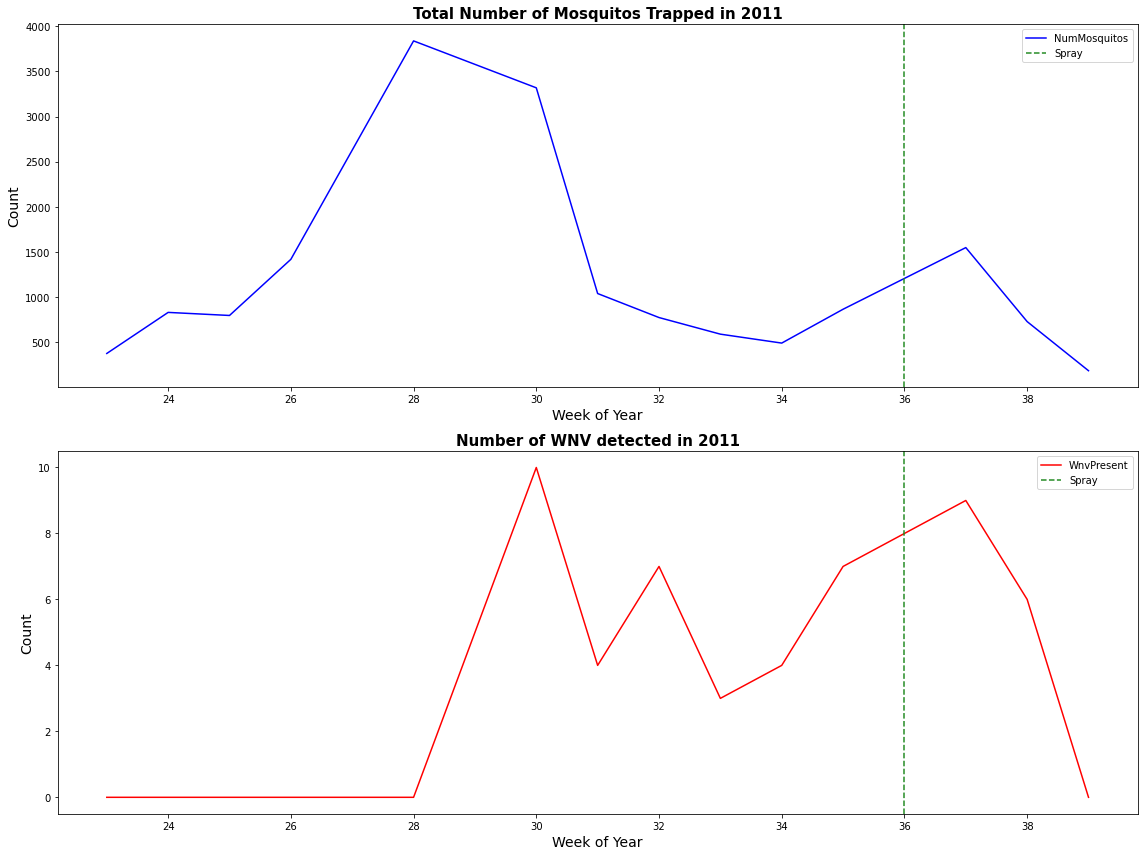

In [79]:
# plot of total number of mosquitos each week in 2011
fig, ax = plt.subplots(nrows=2, figsize=(16,12))

# filter the trap_weather data to only 2011, by the total number of mosquitos trapped
trap_weather_mos_2011 = trap_weather[trap_weather['Year'] == 2011].groupby('Week')['NumMosquitos'].sum()
ax[0].plot(trap_weather_mos_2011.index, trap_weather_mos_2011.values, color='blue')

# plot the dates of sprays in 2011
for week in spray_2011_week:
    ax[0].axvline(x=week, color='forestgreen', ls='--')
ax[0].set_title('Total Number of Mosquitos Trapped in 2011', fontweight='bold', fontsize=15)
ax[0].set_xlabel('Week of Year', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].legend(['NumMosquitos','Spray'], loc='upper right')


# filter the trap_weather data to only 2011, by the total wnv detected
trap_weather_wnv_2011 = trap_weather[trap_weather['Year'] == 2011].groupby('Week')['WnvPresent'].sum()
ax[1].plot(trap_weather_wnv_2011.index, trap_weather_wnv_2011.values, color='red')

# plot the dates of sprays in 2011
for week in spray_2011_week:
    ax[1].axvline(x=week, color='forestgreen', ls='--')
ax[1].set_title('Number of WNV detected in 2011', fontweight='bold', fontsize=15)
ax[1].set_xlabel('Week of Year', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].legend(['WnvPresent','Spray'], loc='upper right')

plt.tight_layout();

plt.savefig('../plots/trap-spray-2011.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: There was only one spray conducted in 2011. From the plot, it seems that both the number of mosquitos and WNV increased following the spray then subsequently decreased in the following week. This could mean that the effect of spray is not immediate, and requires about one week to take effect. 

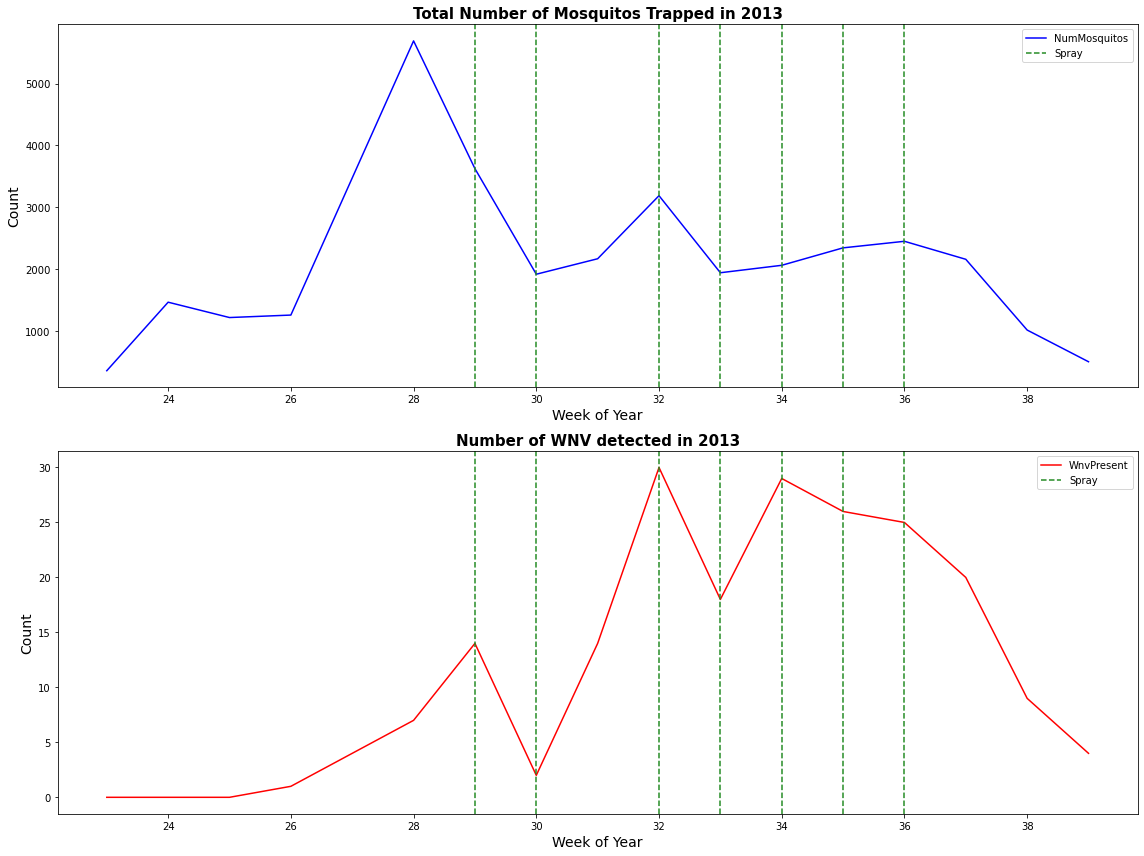

In [80]:
# plot of total number of mosquitos each week in 2013
fig, ax = plt.subplots(nrows=2, figsize=(16,12))

# filter the trap_weather data to only 2011, by the total number of mosquitos trapped
trap_weather_mos_2013 = trap_weather[trap_weather['Year'] == 2013].groupby('Week')['NumMosquitos'].sum()
ax[0].plot(trap_weather_mos_2013.index, trap_weather_mos_2013.values, color='blue')

# plot the dates of sprays in 2013
for week in spray_2013_week:
    ax[0].axvline(x=week, color='forestgreen', ls='--')
ax[0].set_title('Total Number of Mosquitos Trapped in 2013', fontweight='bold', fontsize=15)
ax[0].set_xlabel('Week of Year', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].legend(['NumMosquitos','Spray'], loc='upper right')


# filter the trap_weather data to only 2013, by the total wnv detected
trap_weather_wnv_2013 = trap_weather[trap_weather['Year'] == 2013].groupby('Week')['WnvPresent'].sum()
ax[1].plot(trap_weather_wnv_2013.index, trap_weather_wnv_2013.values, color='red')

# plot the dates of sprays in 2013
for week in spray_2013_week:
    ax[1].axvline(x=week, color='forestgreen', ls='--')
    
ax[1].set_title('Number of WNV detected in 2013', fontweight='bold', fontsize=15)
ax[1].set_xlabel('Week of Year', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].legend(['WnvPresent','Spray'], loc='upper right')


plt.tight_layout();

plt.savefig('../plots/trap-spray-2013.png', dpi='figure', bbox_inches='tight', facecolor=(1, 1, 1))

**Deduction**: More spraying efforts were conducted in 2013. From the top plot, the number of mosquitos showed a general downward trend after the first spray, indicating that spraying helps to reduce the number of mosquitos and hence decreases the chances of the WNV. 

From the bottom plot, the number of WNV detected increased sharply from week 30 to 32 and fluctuated between week 32 to 34 before decreasing after week 34. This may be because the effect of spray is not immediate. Another reason could be that the spraying might not have been targeted at areas with WNV clusters, hence the number of WNV detected did not decrease as much even with spraying efforts.